## Setup


In [585]:
%pip install xgboost missingno


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [586]:
import missingno as msno
import os
import pandas as pd
from xgboost import XGBRegressor
from datetime import datetime

In [587]:
# Import Library


DATA_DIR = "data"
SUBMISSION_DIR = "submission"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_PATH = os.path.join(DATA_DIR, "test_case.csv")
SUBMISSION_PATH = os.path.join(DATA_DIR, "sample_submission.csv")
TARGET = "apparent_temperature (°C)"

"""
Change filename up to your preference
"""
SUBMISSION_NAME = f"submission_{datetime.now().day}-{datetime.now().month}-{datetime.now().year}-{datetime.now().hour}-{datetime.now().minute}.csv"
SUBMISSION_FILE = os.path.join(SUBMISSION_DIR, SUBMISSION_NAME)

In [588]:
pd.set_option("display.max_columns", None)

In [589]:
# Load Data

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(SUBMISSION_PATH)

In [590]:
train.drop(["id", "time"], axis=1, inplace=True)

In [591]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBRegressor
import numpy as np

le = LabelEncoder()
train["city"] = le.fit_transform(train["city"]).astype(np.int64)

## Exploratory Data Analysis


In [592]:
# Data Exploration
""" 
you can fill this section with your code for data exploration
"""
# Example
train.sample(10)

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (km/h),windspeed_100m (km/h),winddirection_10m (°),winddirection_100m (°),windgusts_10m (km/h),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
94466,26.9,90.0,25.1,34.2,1012.3,989.2,0.0,21.0,12.0,14.0,6.0,0.0,0.0,0.0,0.0,3.3,4.7,186.0,189.0,10.4,0.00,0.36,26.6,27.8,27.2,27.0,0.235,0.231,0.270,0.243,4
41755,27.5,84.0,24.5,32.2,1006.3,981.1,0.0,48.0,18.0,3.0,100.0,0.0,0.0,0.0,0.0,11.6,14.8,22.0,18.0,23.0,0.02,0.60,27.4,27.3,27.4,27.5,0.105,0.106,0.106,0.088,7
57959,23.1,95.0,22.2,28.9,1011.1,1012.8,0.0,31.0,2.0,2.0,94.0,19.0,5.0,14.0,0.0,5.6,5.6,230.0,243.0,9.4,0.02,0.15,24.1,25.7,26.8,27.0,0.430,0.430,0.397,0.399,2
231287,17.6,98.0,17.3,20.9,1014.6,881.2,0.0,55.0,18.0,17.0,95.0,0.0,0.0,0.0,0.0,1.1,2.3,90.0,162.0,6.8,0.00,0.04,19.2,20.0,19.8,20.0,0.413,0.421,0.393,0.423,0
237917,24.6,91.0,23.0,29.8,1011.2,1012.9,0.0,62.0,2.0,50.0,100.0,0.0,0.0,0.0,0.0,7.5,11.8,163.0,157.0,14.8,0.01,0.29,25.3,27.1,27.0,26.9,0.412,0.397,0.384,0.416,2
136881,28.3,79.0,24.3,35.1,1008.8,985.9,0.0,20.0,10.0,19.0,0.0,290.0,217.0,73.0,667.5,5.8,8.1,173.0,167.0,20.2,0.21,0.81,28.8,27.4,26.4,26.5,0.148,0.162,0.188,0.289,4
236013,24.7,99.0,24.6,31.6,1011.7,988.5,0.0,60.0,21.0,18.0,100.0,0.0,0.0,0.0,0.0,5.3,7.8,332.0,338.0,10.1,0.00,0.03,25.0,26.0,26.5,26.5,0.322,0.325,0.288,0.308,4
85440,25.7,96.0,25.0,29.0,1007.1,989.7,0.0,99.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,8.7,16.6,275.0,274.0,17.3,0.00,0.13,22.0,23.1,23.4,24.1,0.443,0.435,0.439,0.453,1
123002,24.5,88.0,22.4,30.1,1010.4,987.2,0.0,18.0,4.0,1.0,45.0,12.0,5.0,7.0,0.0,10.7,17.2,166.0,160.0,29.5,0.04,0.37,23.0,25.1,26.4,26.5,0.180,0.157,0.181,0.286,4
43048,27.0,90.0,25.2,33.4,1010.6,1010.1,0.0,34.0,5.0,0.0,97.0,0.0,0.0,0.0,0.0,3.1,3.3,339.0,354.0,9.0,0.00,0.36,26.4,27.1,27.2,27.2,0.386,0.390,0.394,0.388,3


In [593]:
train.head(10)

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (km/h),windspeed_100m (km/h),winddirection_10m (°),winddirection_100m (°),windgusts_10m (km/h),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,28.8,78.0,24.6,33.7,1010.8,1010.3,0.0,50.0,13.0,17.0,93.0,460.0,190.0,270.0,222.1,11.4,15.3,204.0,204.0,25.9,0.33,0.88,29.0,26.7,26.9,27.0,0.386,0.391,0.398,0.397,3
1,24.9,97.0,24.4,31.9,1008.5,1010.2,0.0,20.0,2.0,28.0,4.0,0.0,0.0,0.0,0.0,2.6,5.8,164.0,120.0,7.6,0.00,0.09,25.8,27.5,27.0,26.5,0.344,0.348,0.316,0.401,2
2,28.7,64.0,21.3,34.4,1013.6,1015.3,0.0,76.0,32.0,39.0,79.0,779.0,618.0,161.0,720.9,7.6,9.4,8.0,7.0,18.7,0.56,1.41,28.7,25.9,26.4,26.1,0.300,0.286,0.328,0.418,2
3,24.9,90.0,23.1,28.3,1012.8,987.2,0.0,65.0,48.0,0.0,73.0,0.0,0.0,0.0,0.0,14.5,18.7,113.0,115.0,27.7,0.01,0.31,24.8,25.1,25.3,25.4,0.076,0.077,0.068,0.095,7
4,12.7,92.0,11.5,12.8,1016.6,743.8,0.0,100.0,81.0,80.0,83.0,0.0,0.0,0.0,0.0,0.5,1.9,225.0,292.0,22.7,0.00,0.11,14.6,16.0,16.8,16.5,0.328,0.334,0.350,0.340,6
5,27.0,90.0,25.3,32.8,1008.5,1008.0,0.0,71.0,34.0,25.0,85.0,17.0,0.0,17.0,0.0,7.4,11.2,43.0,48.0,12.6,0.03,0.34,27.7,27.1,27.4,27.3,0.393,0.383,0.400,0.395,3
6,12.6,90.0,11.0,12.4,1016.5,744.0,0.0,62.0,17.0,27.0,100.0,79.0,32.0,47.0,153.2,5.2,7.8,192.0,193.0,22.7,0.04,0.14,16.6,17.0,16.4,16.4,0.291,0.304,0.318,0.348,6
7,30.0,64.0,22.6,37.2,1010.8,988.0,0.0,5.0,0.0,0.0,17.0,949.0,841.0,108.0,899.8,9.3,11.7,193.0,189.0,31.0,0.71,1.51,31.6,27.0,26.4,25.9,0.118,0.066,0.110,0.216,4
8,25.4,94.0,24.4,30.1,1012.0,994.5,0.0,6.0,1.0,8.0,1.0,69.0,40.0,29.0,0.0,5.1,6.5,172.0,146.0,13.7,0.04,0.18,21.5,22.9,24.1,24.1,0.416,0.414,0.352,0.416,1
9,14.8,96.0,14.1,17.8,1013.3,744.7,0.0,100.0,92.0,50.0,97.0,301.0,72.0,229.0,113.5,1.8,1.5,191.0,194.0,21.6,0.20,0.07,19.3,17.8,16.8,16.4,0.367,0.357,0.332,0.354,6


<Axes: >

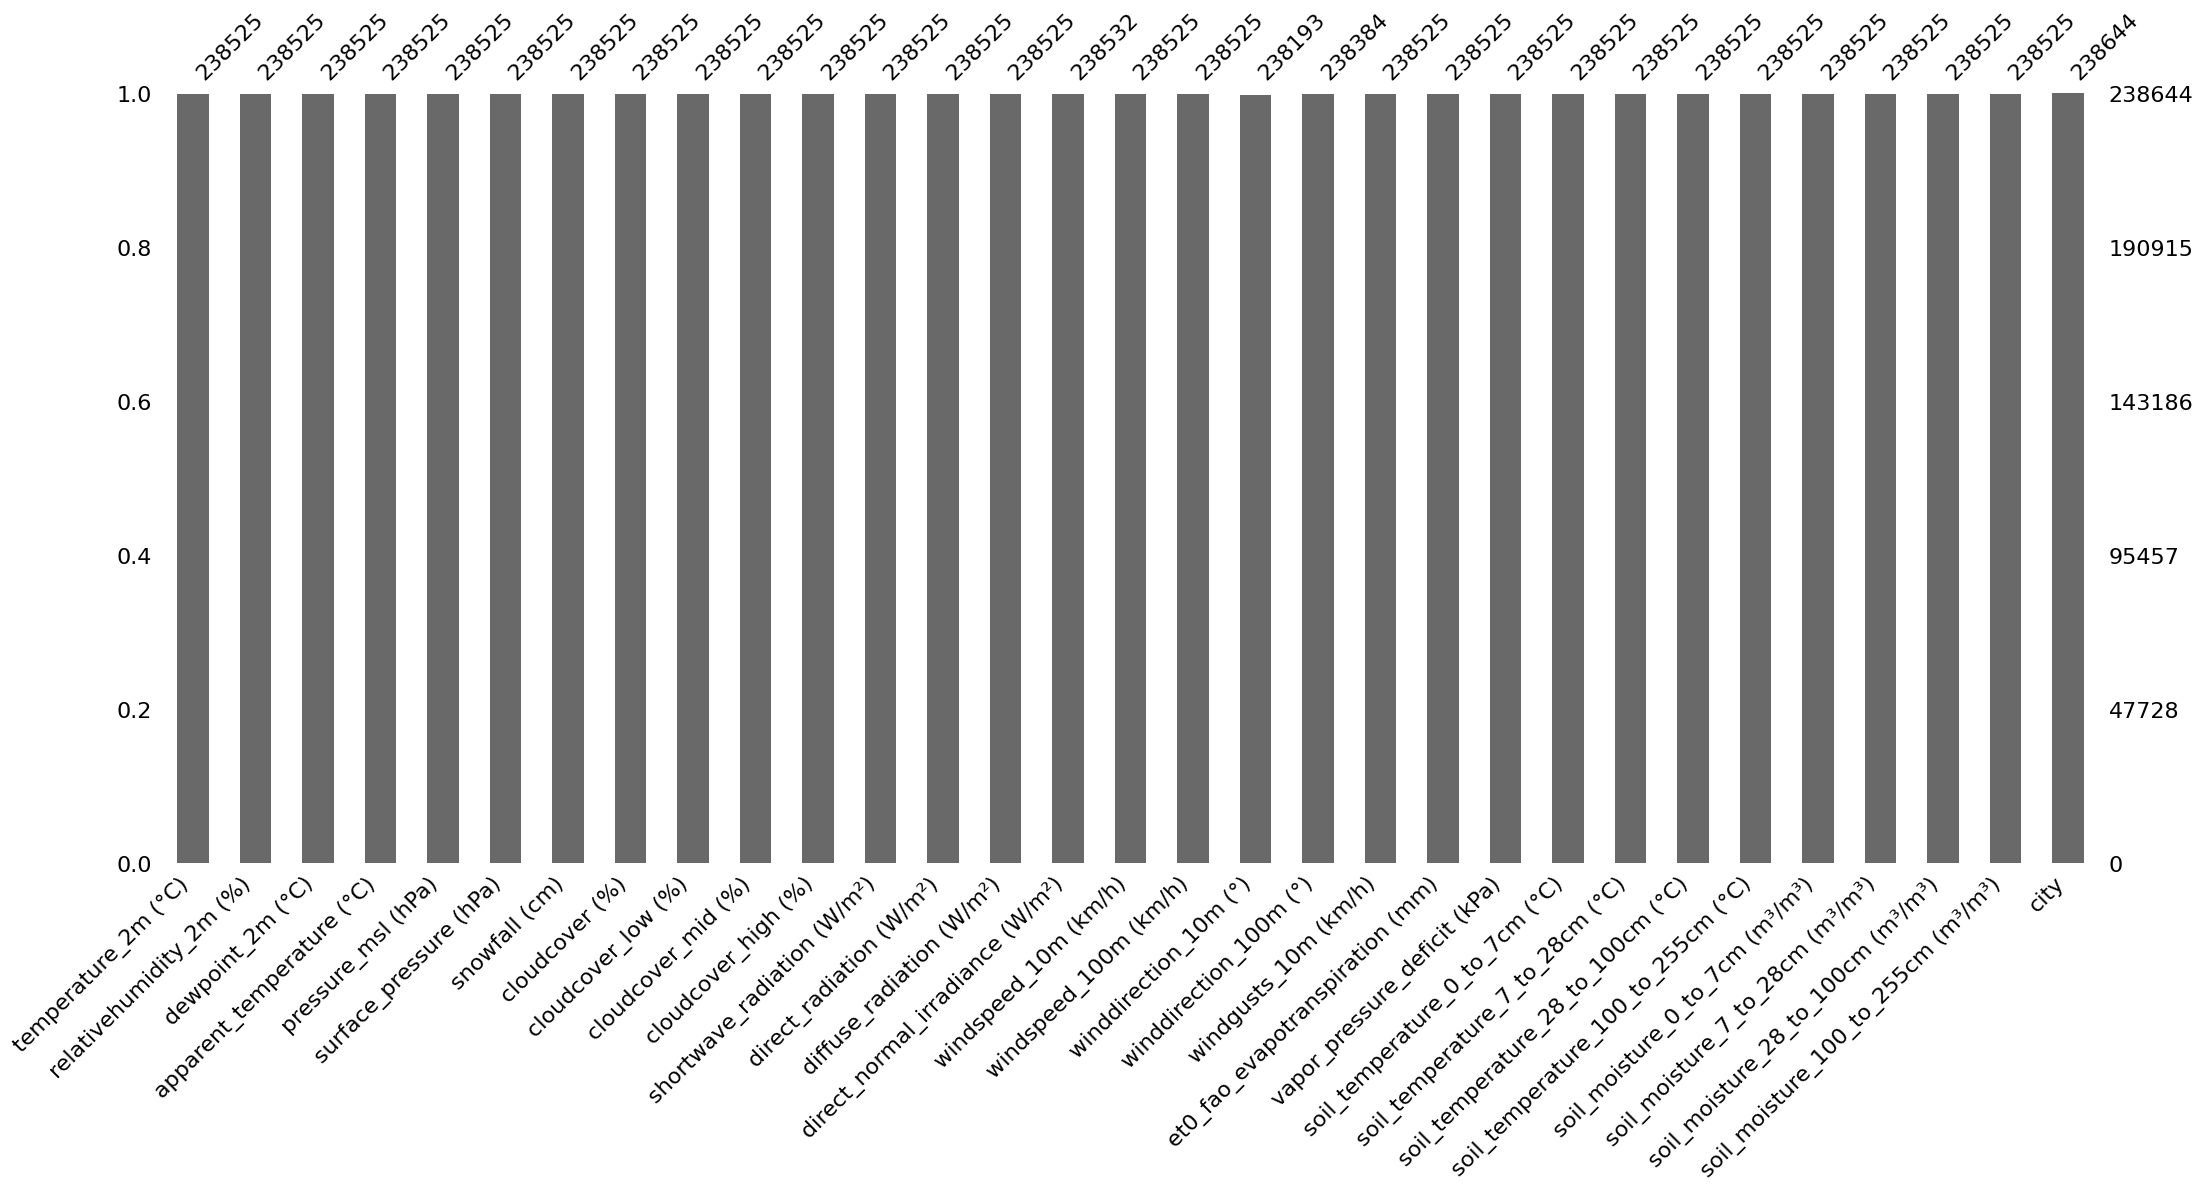

In [594]:
msno.bar(train)

<Axes: >

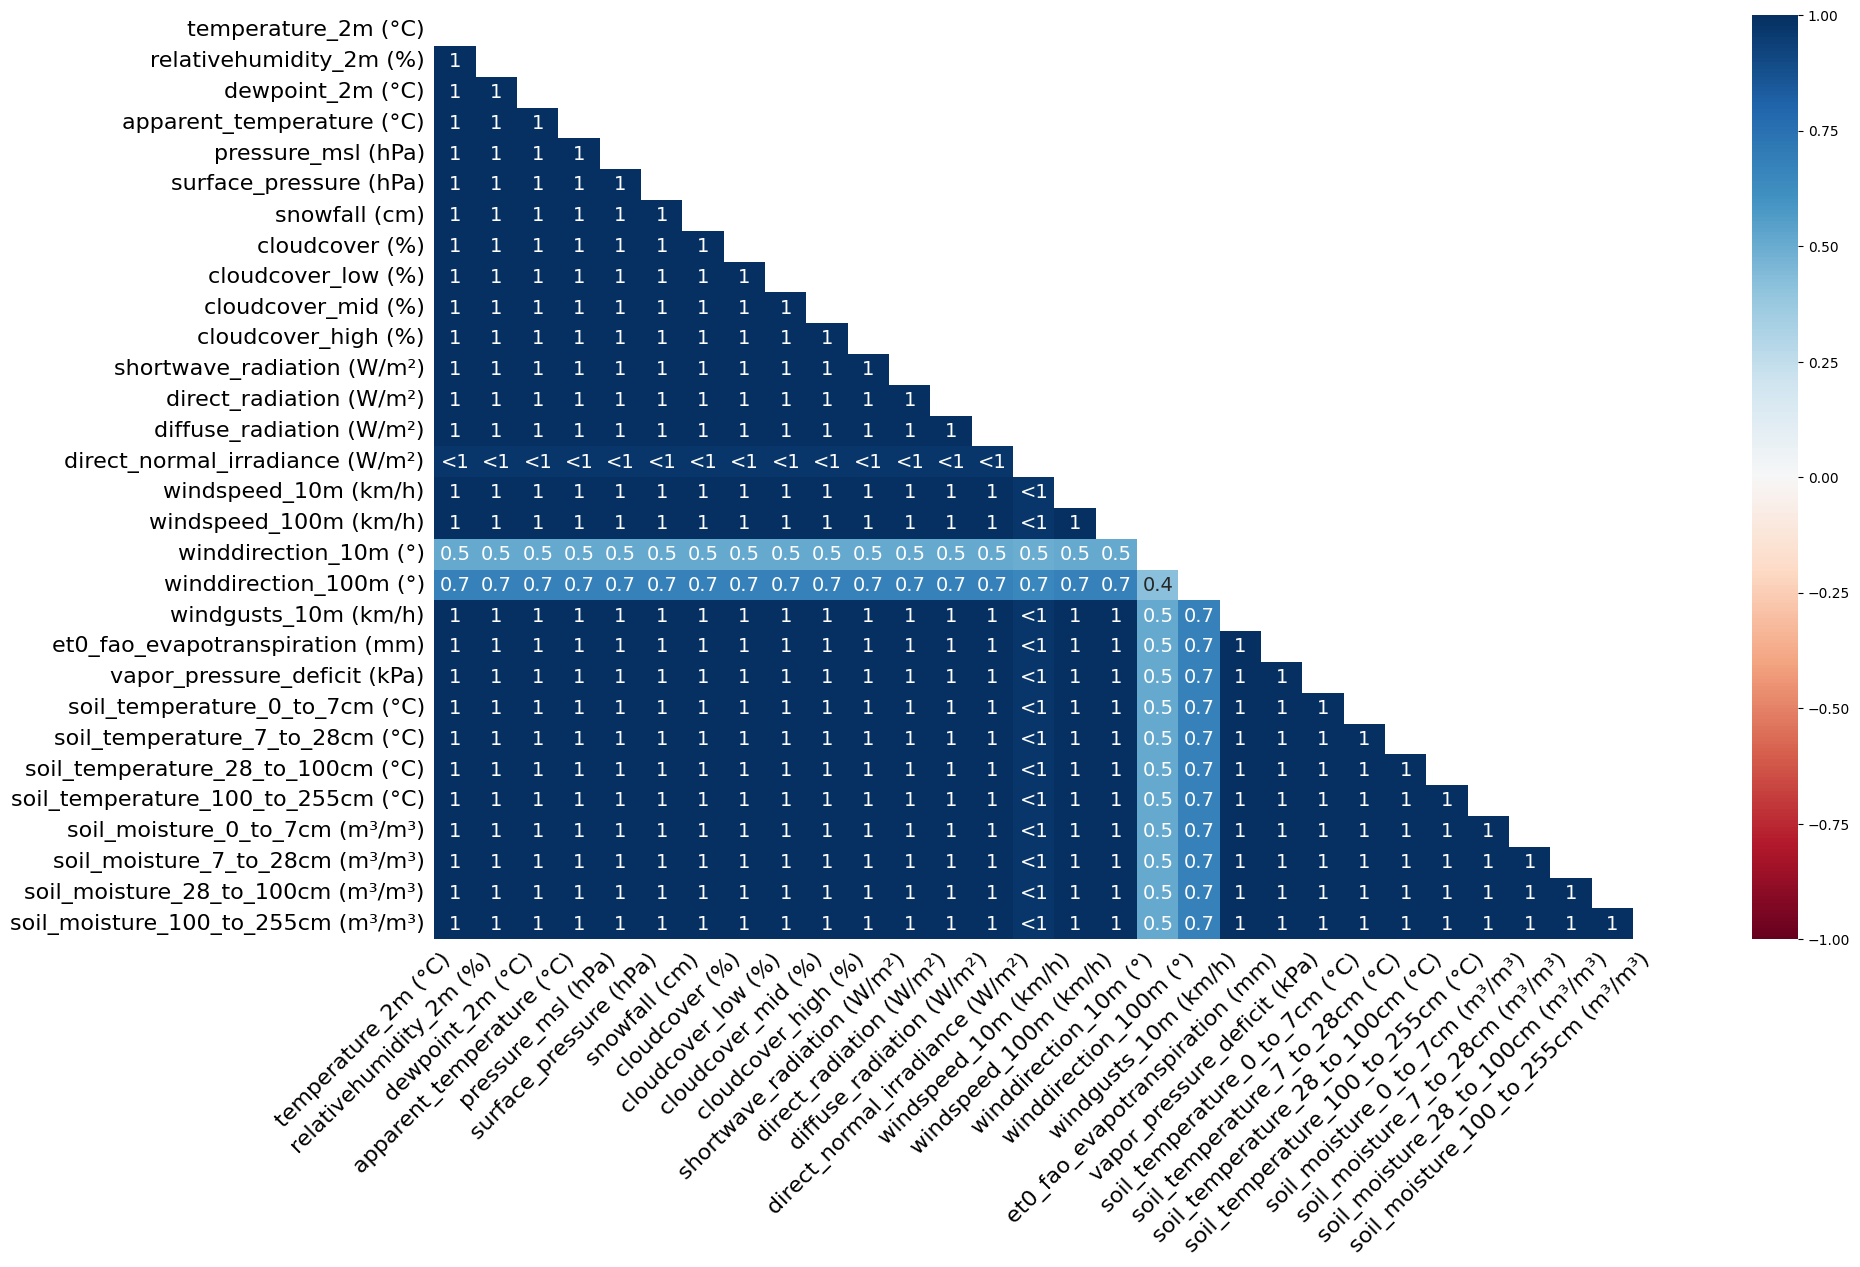

In [595]:
msno.heatmap(train)

In [598]:
(train.isnull().sum() / len(train)) * 100

temperature_2m (°C)                   0.0
relativehumidity_2m (%)               0.0
dewpoint_2m (°C)                      0.0
apparent_temperature (°C)             0.0
pressure_msl (hPa)                    0.0
surface_pressure (hPa)                0.0
snowfall (cm)                         0.0
cloudcover (%)                        0.0
cloudcover_low (%)                    0.0
cloudcover_mid (%)                    0.0
cloudcover_high (%)                   0.0
shortwave_radiation (W/m²)            0.0
direct_radiation (W/m²)               0.0
diffuse_radiation (W/m²)              0.0
direct_normal_irradiance (W/m²)       0.0
windspeed_10m (km/h)                  0.0
windspeed_100m (km/h)                 0.0
winddirection_10m (°)                 0.0
winddirection_100m (°)                0.0
windgusts_10m (km/h)                  0.0
et0_fao_evapotranspiration (mm)       0.0
vapor_pressure_deficit (kPa)          0.0
soil_temperature_0_to_7cm (°C)        0.0
soil_temperature_7_to_28cm (°C)   

In [596]:
train.dropna(inplace=True)

In [597]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238076 entries, 0 to 238643
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temperature_2m (°C)                 238076 non-null  float64
 1   relativehumidity_2m (%)             238076 non-null  float64
 2   dewpoint_2m (°C)                    238076 non-null  float64
 3   apparent_temperature (°C)           238076 non-null  float64
 4   pressure_msl (hPa)                  238076 non-null  float64
 5   surface_pressure (hPa)              238076 non-null  float64
 6   snowfall (cm)                       238076 non-null  float64
 7   cloudcover (%)                      238076 non-null  float64
 8   cloudcover_low (%)                  238076 non-null  float64
 9   cloudcover_mid (%)                  238076 non-null  float64
 10  cloudcover_high (%)                 238076 non-null  float64
 11  shortwave_radiation (W/m²)     

temperature_2m (°C)
Skew : -1.26


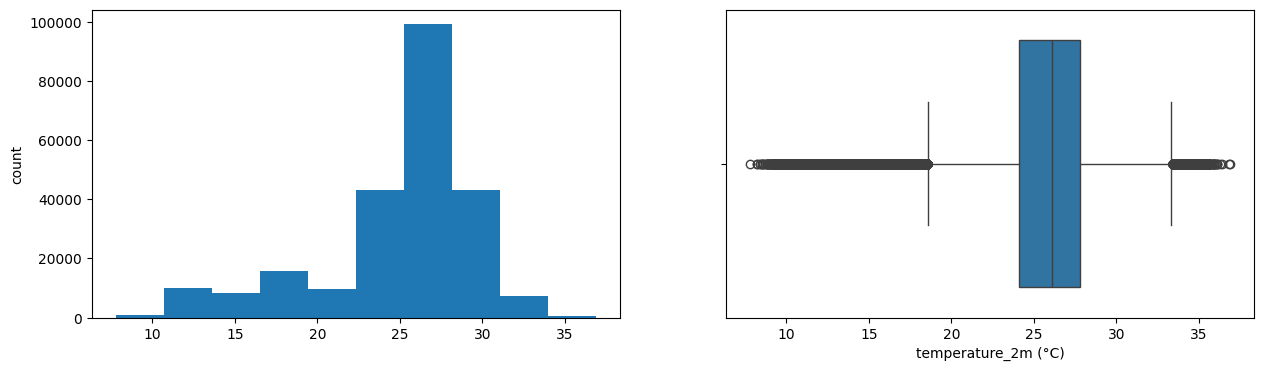

relativehumidity_2m (%)
Skew : -1.45


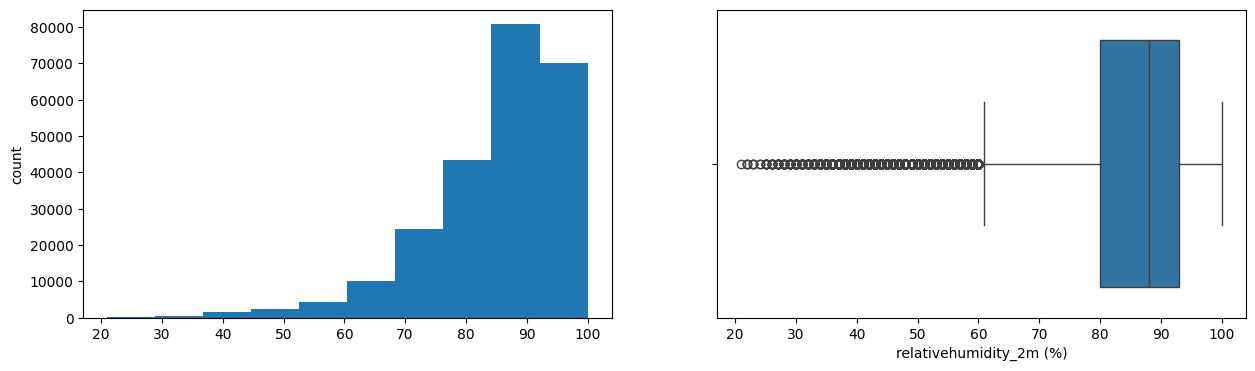

dewpoint_2m (°C)
Skew : -1.48


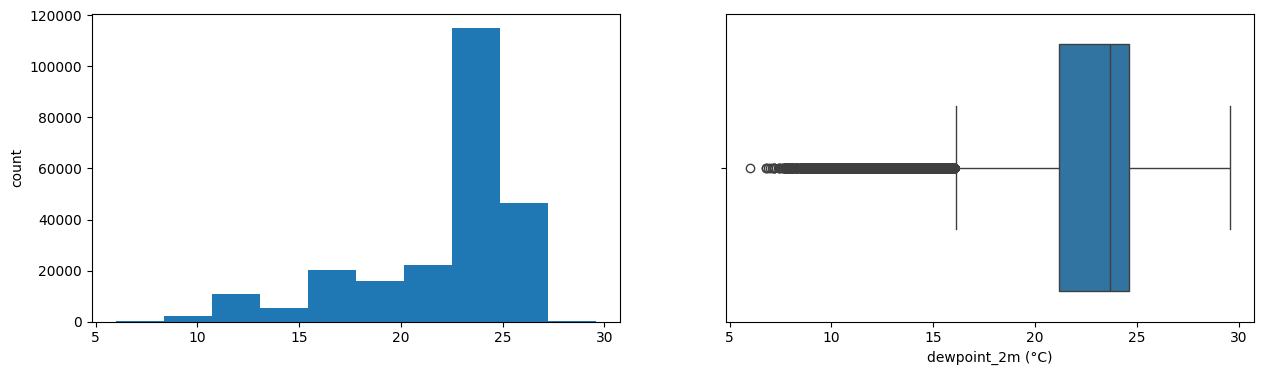

apparent_temperature (°C)
Skew : -1.29


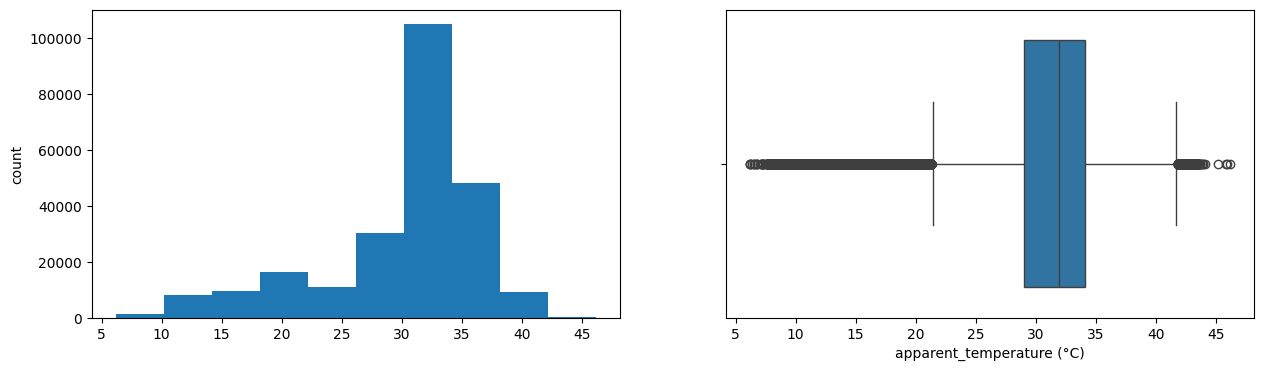

pressure_msl (hPa)
Skew : 0.6


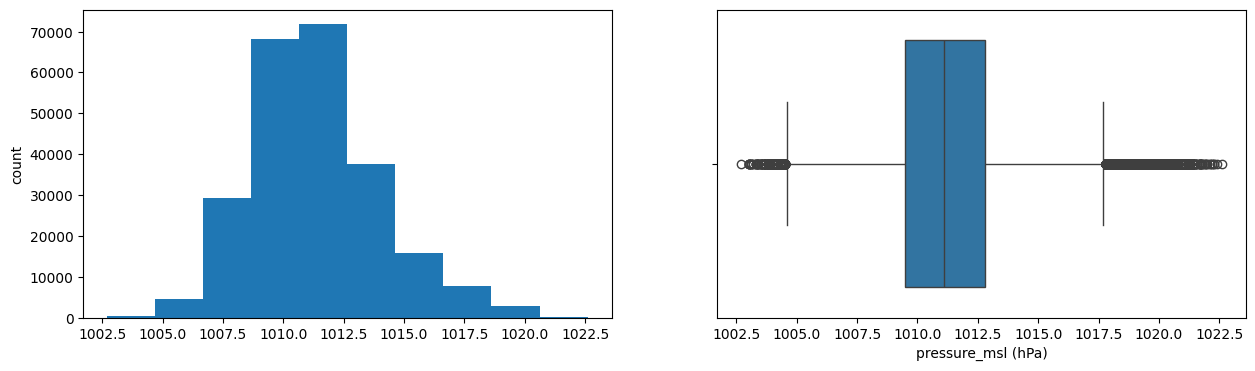

surface_pressure (hPa)
Skew : -2.03


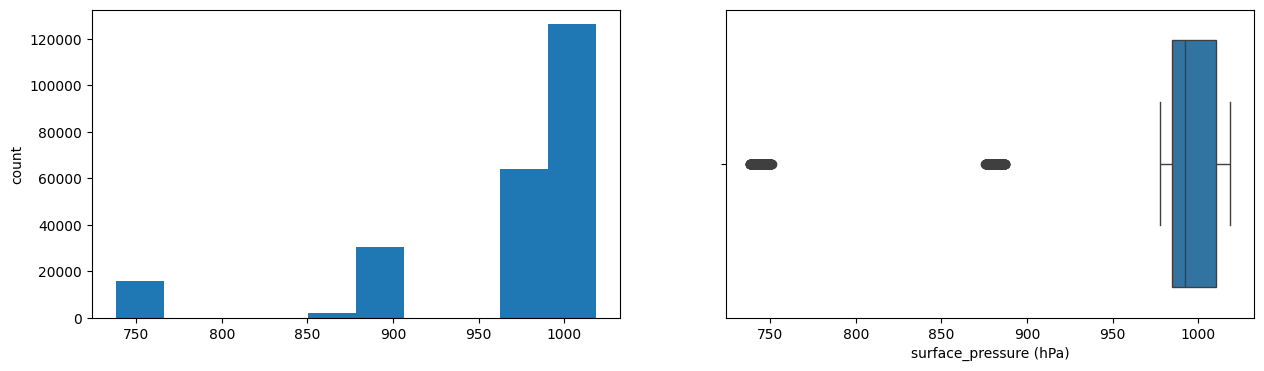

snowfall (cm)
Skew : 0.0


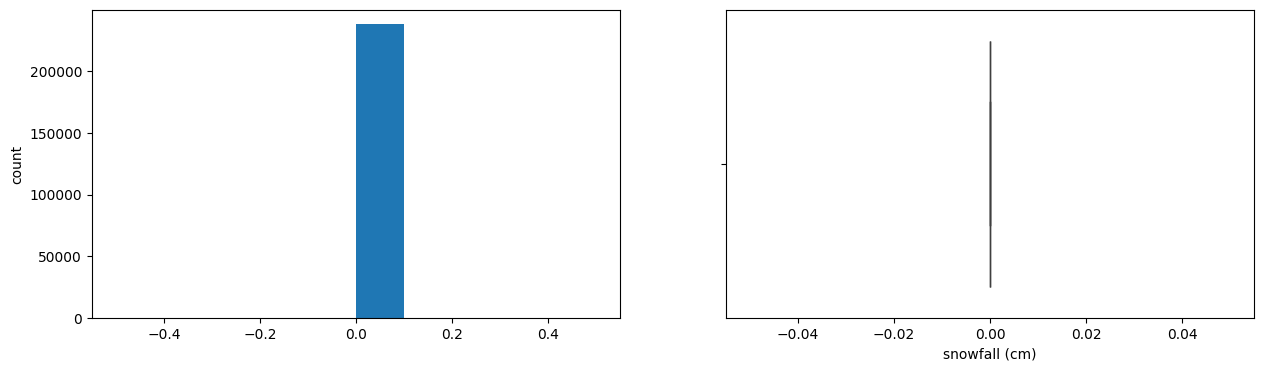

cloudcover (%)
Skew : 0.11


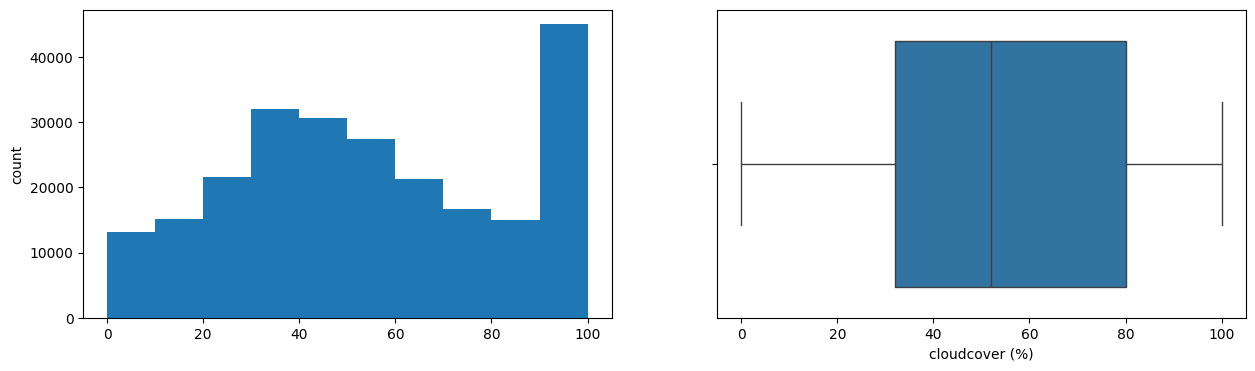

cloudcover_low (%)
Skew : 1.4


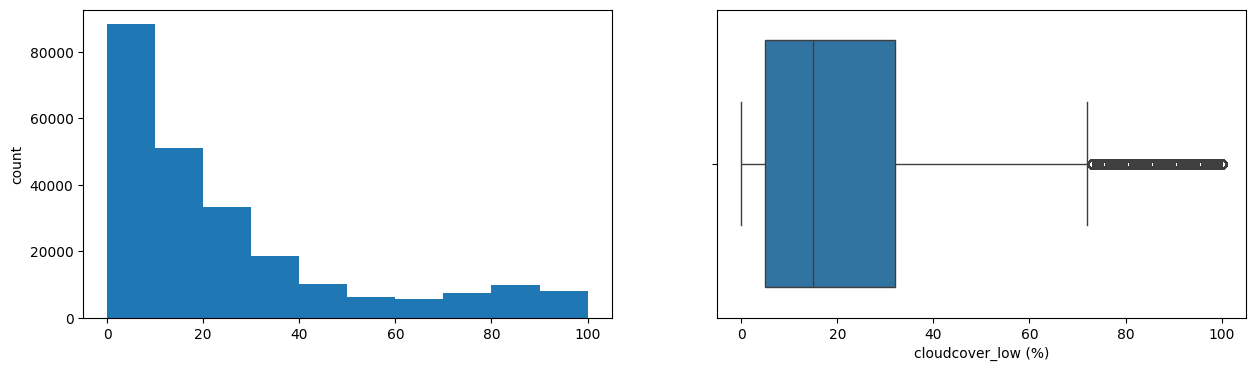

cloudcover_mid (%)
Skew : 1.16


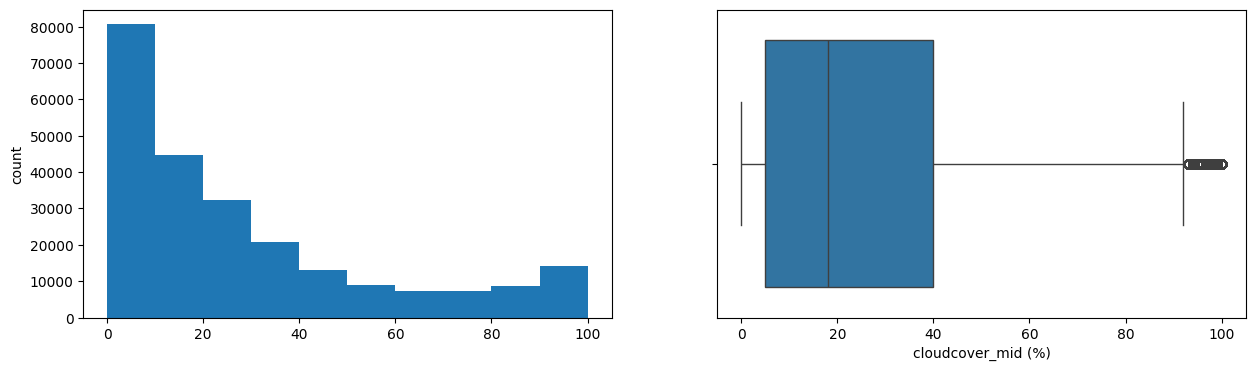

cloudcover_high (%)
Skew : -0.85


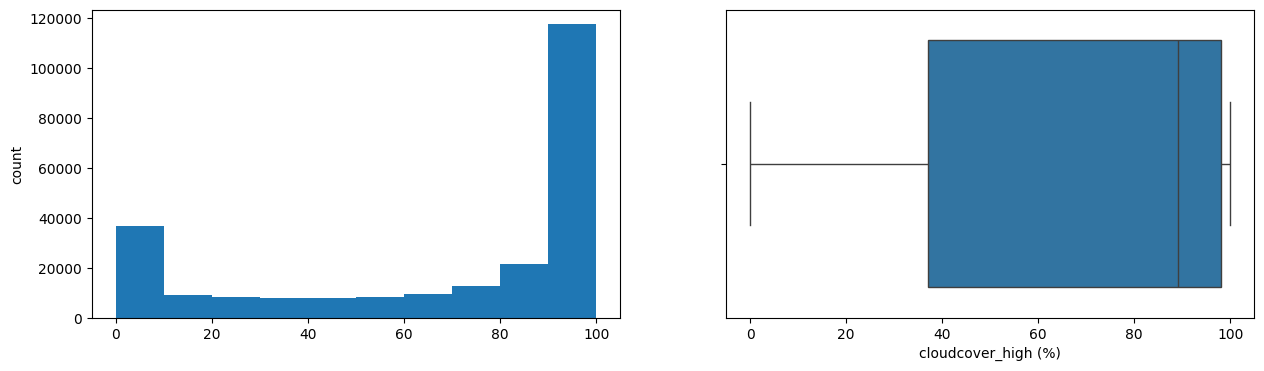

shortwave_radiation (W/m²)
Skew : 1.06


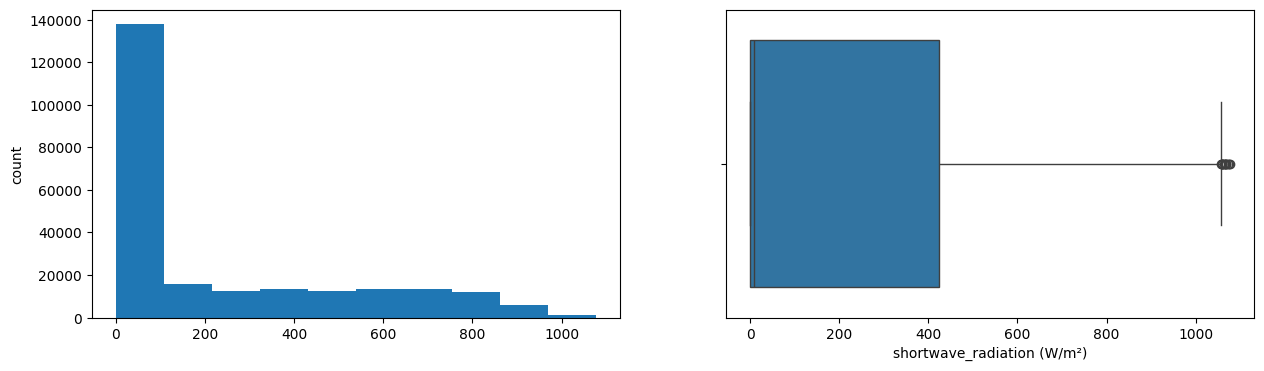

direct_radiation (W/m²)
Skew : 1.48


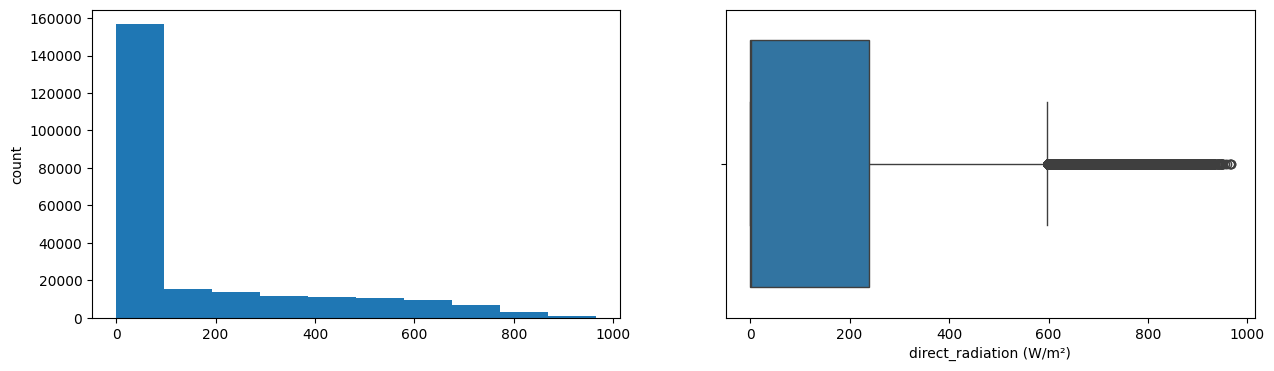

diffuse_radiation (W/m²)
Skew : 1.19


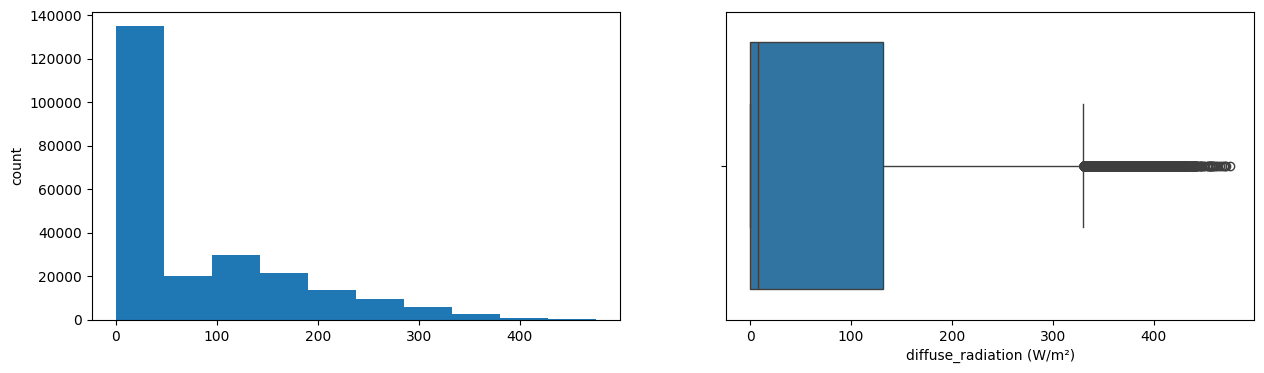

direct_normal_irradiance (W/m²)
Skew : 1.04


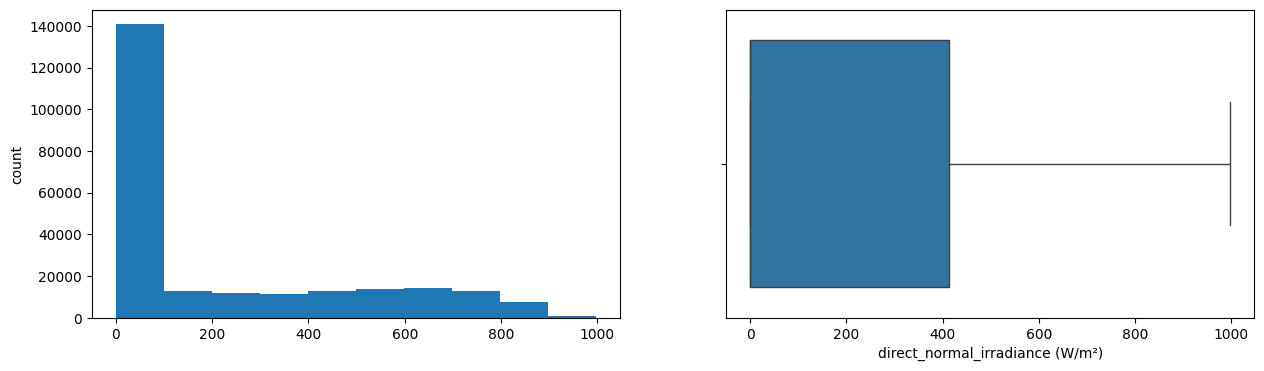

windspeed_10m (km/h)
Skew : 1.27


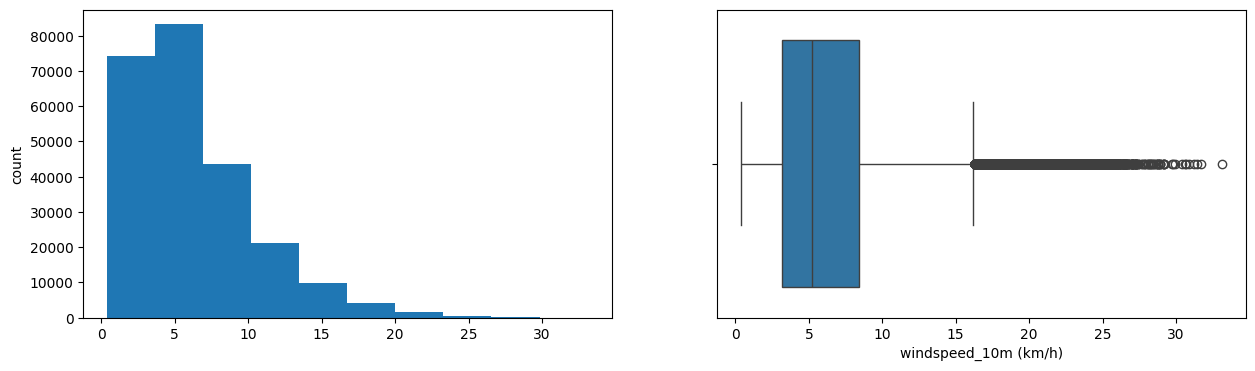

windspeed_100m (km/h)
Skew : 0.97


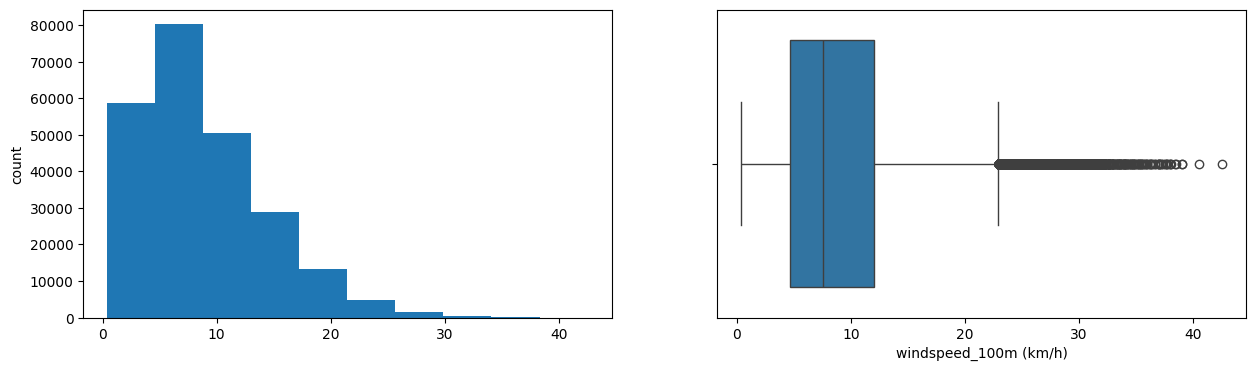

winddirection_10m (°)
Skew : 0.04


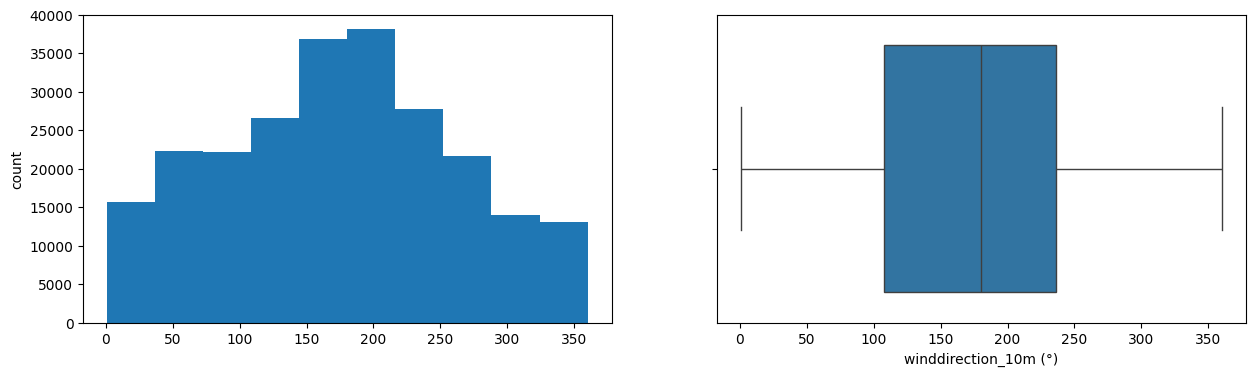

winddirection_100m (°)
Skew : 0.09


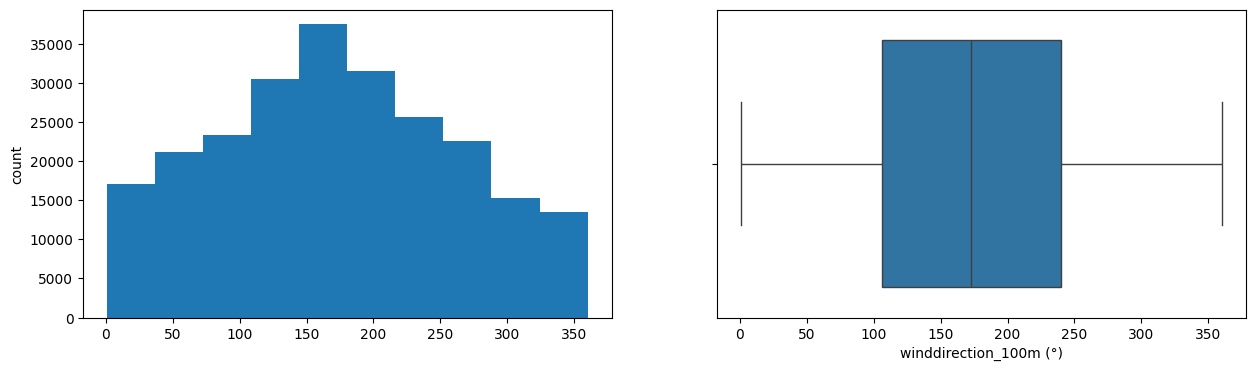

windgusts_10m (km/h)
Skew : 0.84


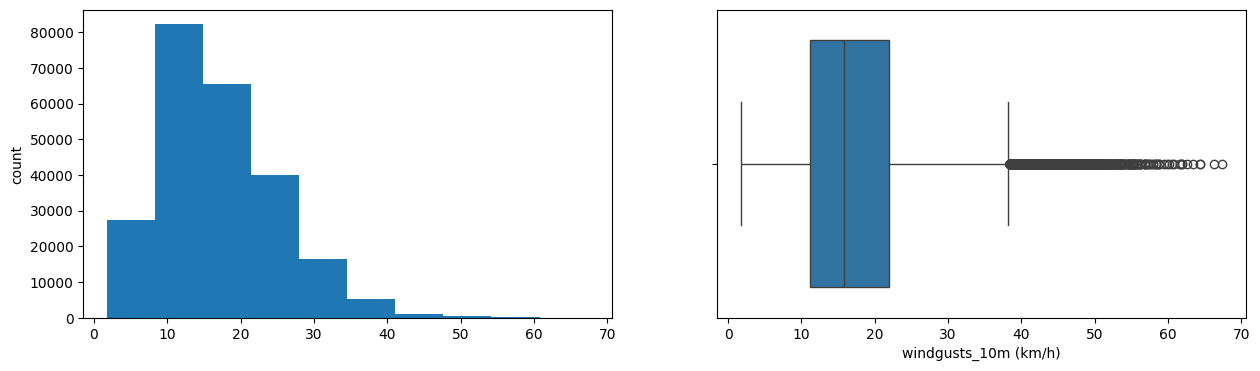

et0_fao_evapotranspiration (mm)
Skew : 1.11


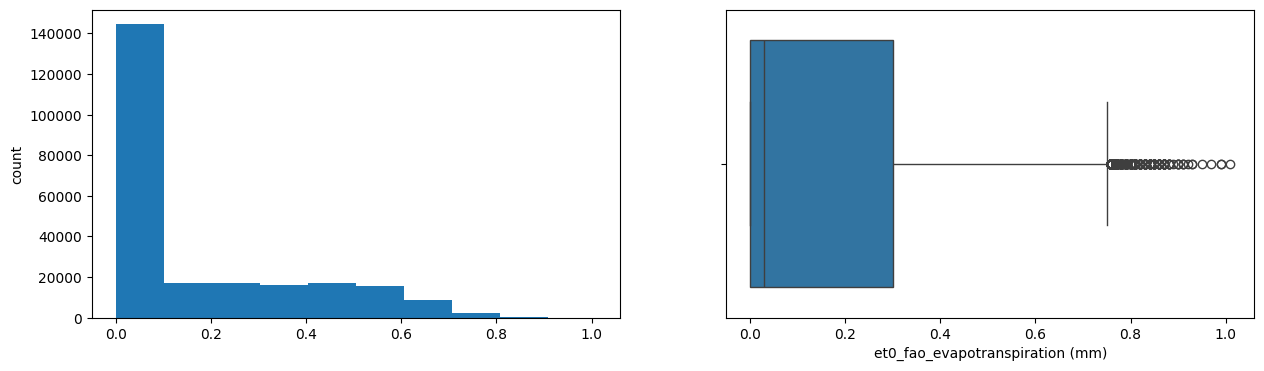

vapor_pressure_deficit (kPa)
Skew : 2.16


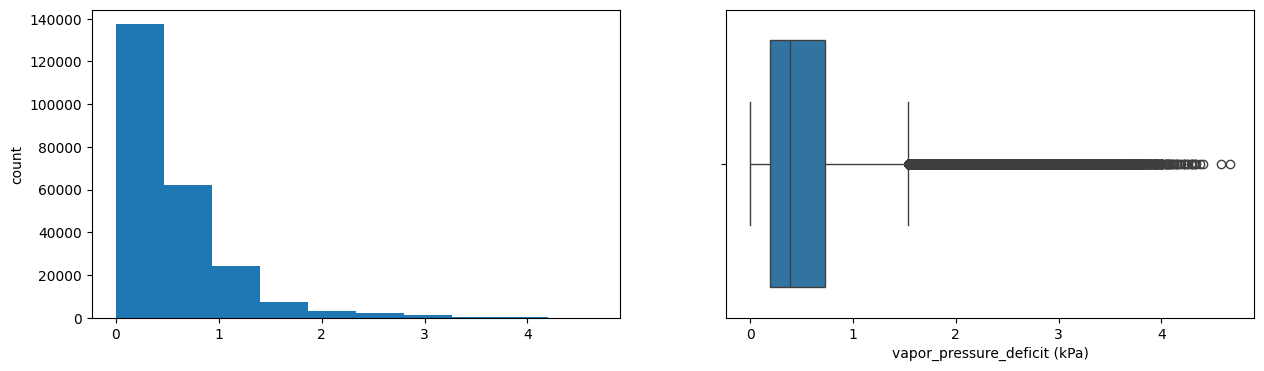

soil_temperature_0_to_7cm (°C)
Skew : -0.21


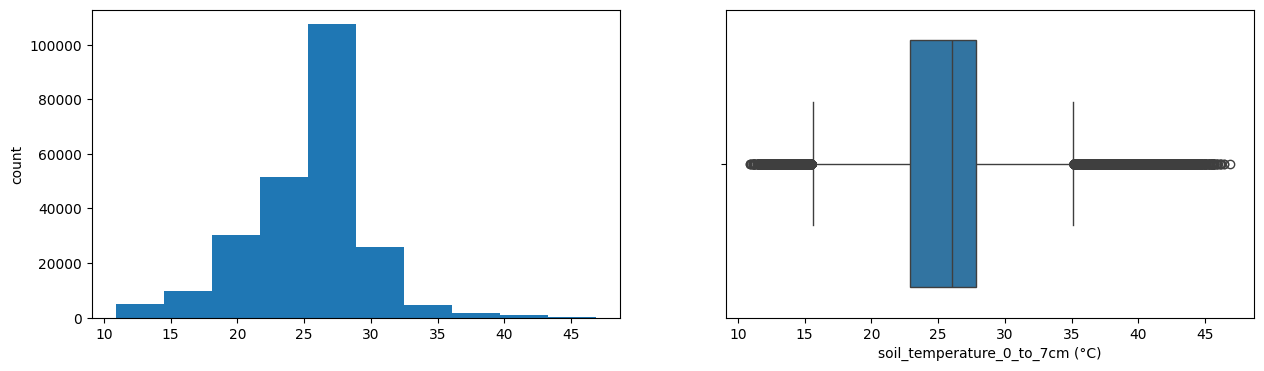

soil_temperature_7_to_28cm (°C)
Skew : -0.91


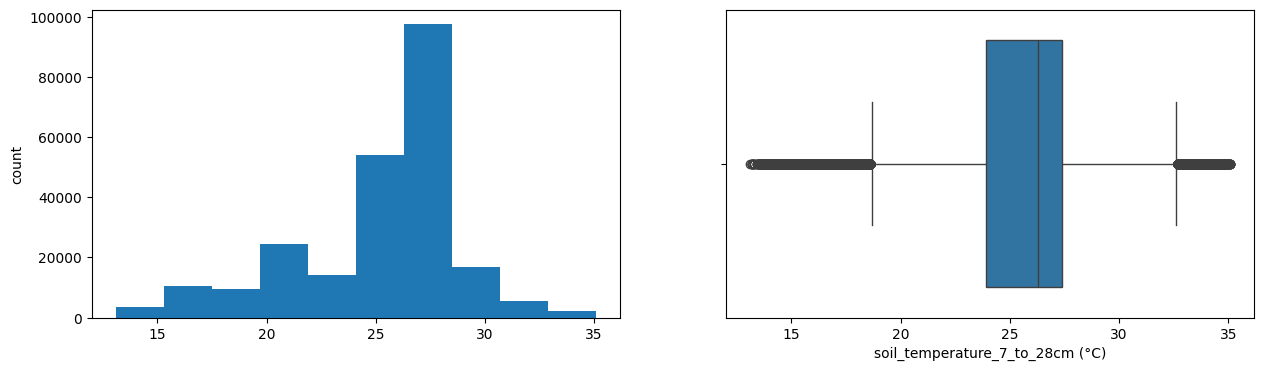

soil_temperature_28_to_100cm (°C)
Skew : -1.02


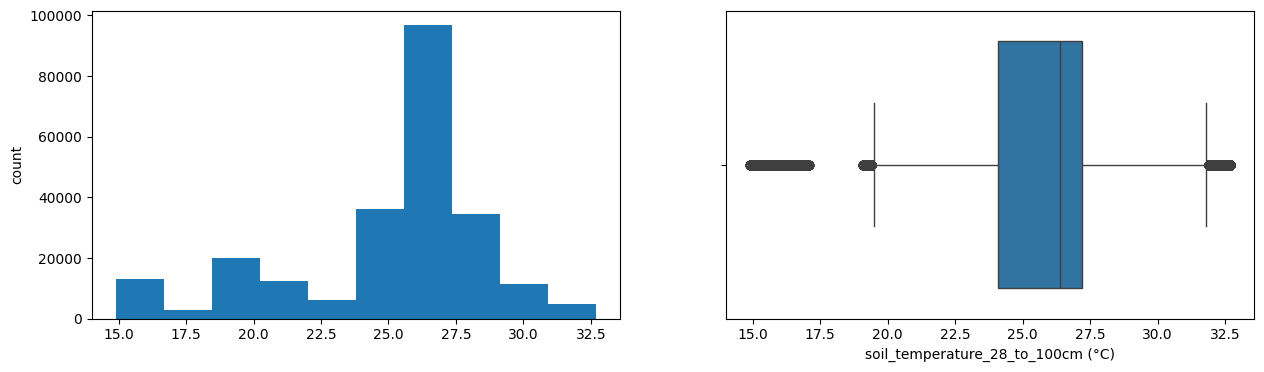

soil_temperature_100_to_255cm (°C)
Skew : -1.08


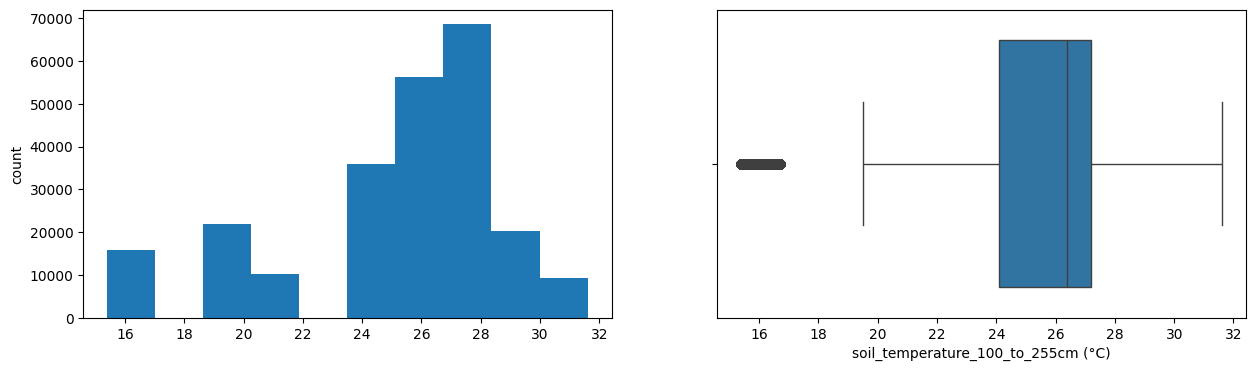

soil_moisture_0_to_7cm (m³/m³)
Skew : -0.71


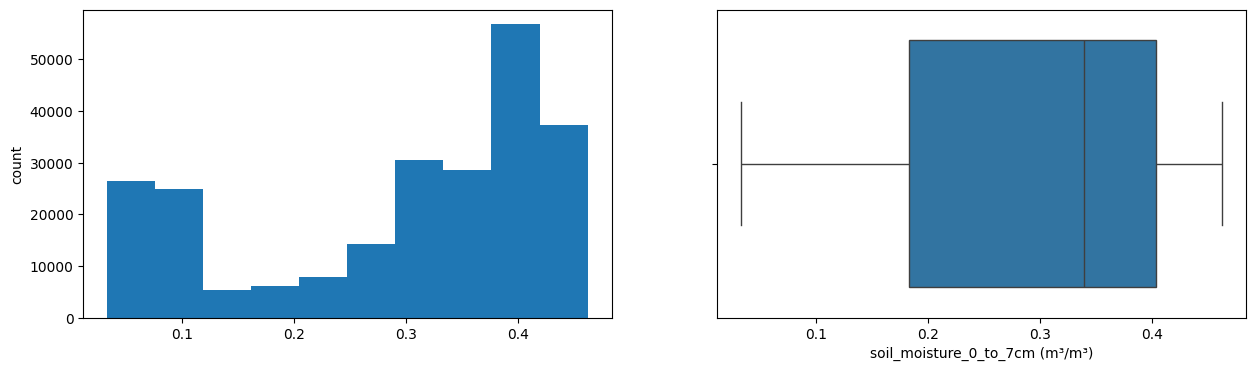

soil_moisture_7_to_28cm (m³/m³)
Skew : -0.68


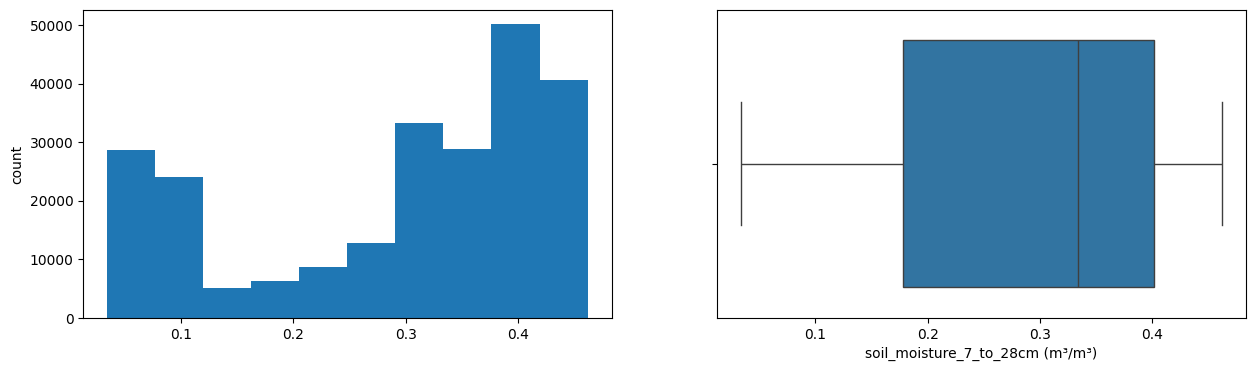

soil_moisture_28_to_100cm (m³/m³)
Skew : -0.61


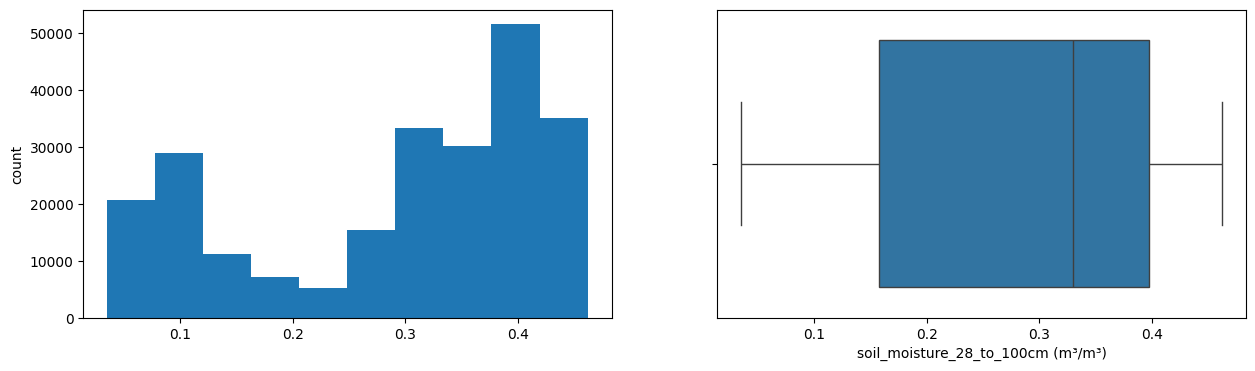

soil_moisture_100_to_255cm (m³/m³)
Skew : -0.9


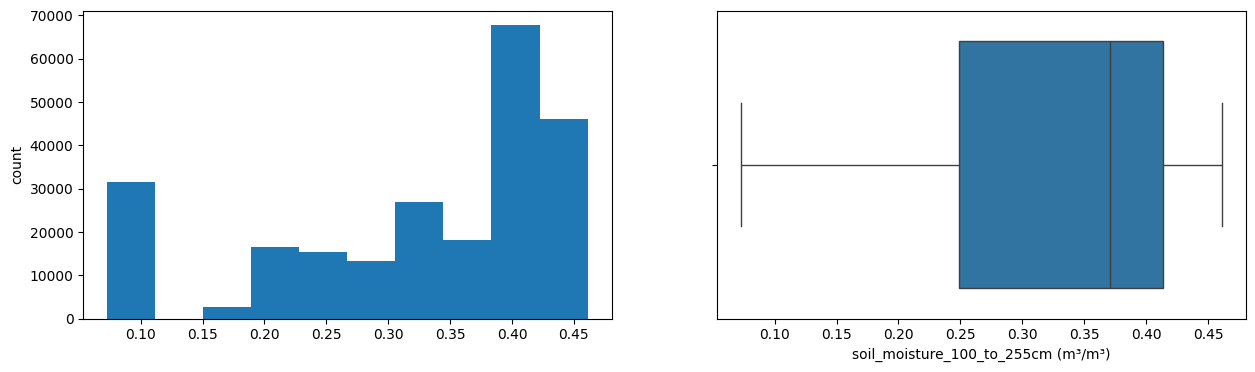

city
Skew : 0.13


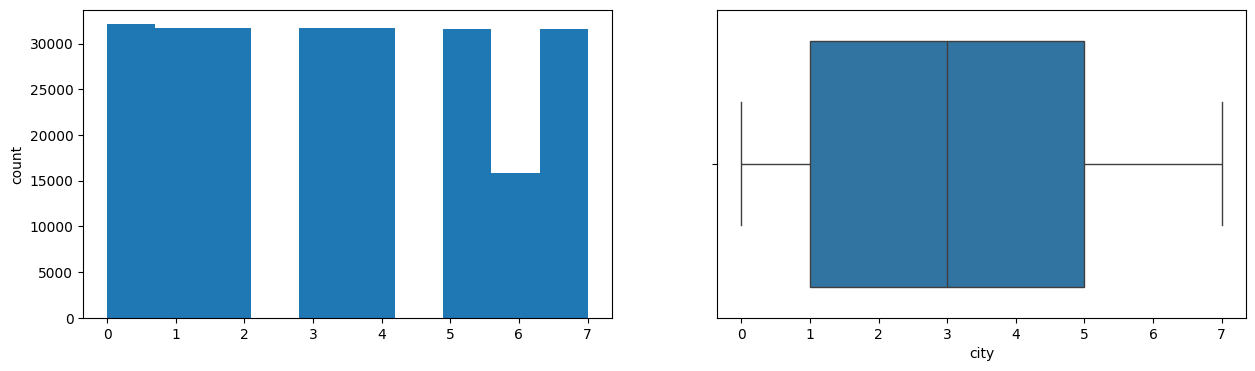

In [599]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = train.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_columns:
    print(col)
    print("Skew :", round(train[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

In [600]:
from scipy.stats import zscore
import numpy as np


def symmetric_zscore_filter(series, threshold=2):
    z_scores = np.abs(zscore(series))
    return series[z_scores < threshold]

In [601]:
train.drop("snowfall (cm)", axis=1, inplace=True)

In [602]:
train.dropna(inplace=True)

In [603]:
train

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (km/h),windspeed_100m (km/h),winddirection_10m (°),winddirection_100m (°),windgusts_10m (km/h),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,28.8,78.0,24.6,33.7,1010.8,1010.3,50.0,13.0,17.0,93.0,460.0,190.0,270.0,222.1,11.4,15.3,204.0,204.0,25.9,0.33,0.88,29.0,26.7,26.9,27.0,0.386,0.391,0.398,0.397,3
1,24.9,97.0,24.4,31.9,1008.5,1010.2,20.0,2.0,28.0,4.0,0.0,0.0,0.0,0.0,2.6,5.8,164.0,120.0,7.6,0.00,0.09,25.8,27.5,27.0,26.5,0.344,0.348,0.316,0.401,2
2,28.7,64.0,21.3,34.4,1013.6,1015.3,76.0,32.0,39.0,79.0,779.0,618.0,161.0,720.9,7.6,9.4,8.0,7.0,18.7,0.56,1.41,28.7,25.9,26.4,26.1,0.300,0.286,0.328,0.418,2
3,24.9,90.0,23.1,28.3,1012.8,987.2,65.0,48.0,0.0,73.0,0.0,0.0,0.0,0.0,14.5,18.7,113.0,115.0,27.7,0.01,0.31,24.8,25.1,25.3,25.4,0.076,0.077,0.068,0.095,7
4,12.7,92.0,11.5,12.8,1016.6,743.8,100.0,81.0,80.0,83.0,0.0,0.0,0.0,0.0,0.5,1.9,225.0,292.0,22.7,0.00,0.11,14.6,16.0,16.8,16.5,0.328,0.334,0.350,0.340,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238639,26.6,89.0,24.6,33.2,1009.9,986.8,26.0,8.0,14.0,33.0,0.0,0.0,0.0,0.0,4.4,7.6,189.0,185.0,11.2,0.00,0.38,24.8,25.9,26.7,26.8,0.321,0.327,0.292,0.319,4
238640,29.9,79.0,25.9,38.2,1011.7,986.5,38.0,23.0,27.0,3.0,992.0,873.0,119.0,922.1,10.3,10.7,209.0,213.0,24.5,0.70,0.88,28.8,28.0,28.0,28.0,0.084,0.081,0.089,0.077,7
238641,26.8,85.0,24.1,35.3,1009.2,1010.9,33.0,3.0,3.0,94.0,26.0,10.0,16.0,182.9,3.3,4.8,49.0,48.0,10.4,0.03,0.52,27.9,27.6,26.5,26.4,0.353,0.351,0.328,0.409,2
238642,28.4,83.0,25.3,34.3,1009.4,984.2,61.0,22.0,37.0,62.0,710.0,607.0,103.0,797.8,12.9,14.5,150.0,145.0,25.2,0.47,0.64,28.0,27.5,27.3,27.3,0.082,0.071,0.082,0.103,7


temperature_2m (°C)
Skew : -0.95


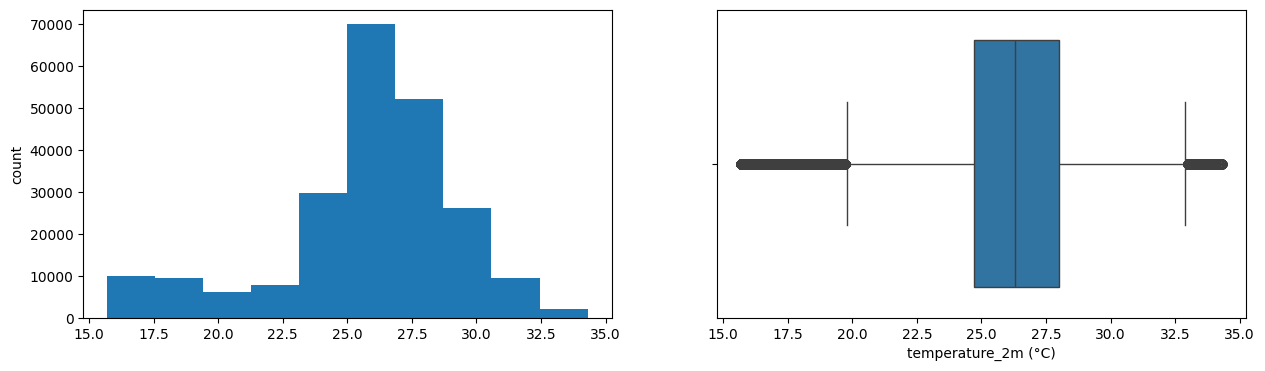

relativehumidity_2m (%)
Skew : -0.68


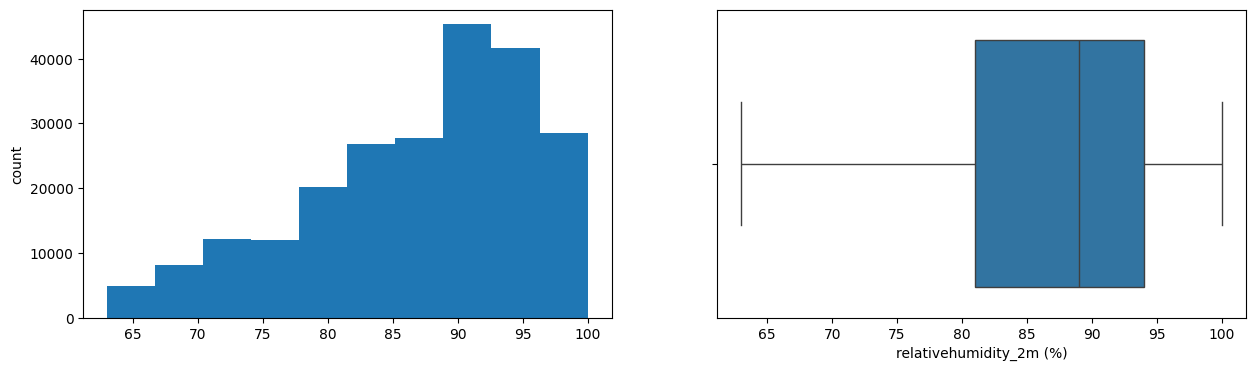

dewpoint_2m (°C)
Skew : -1.3


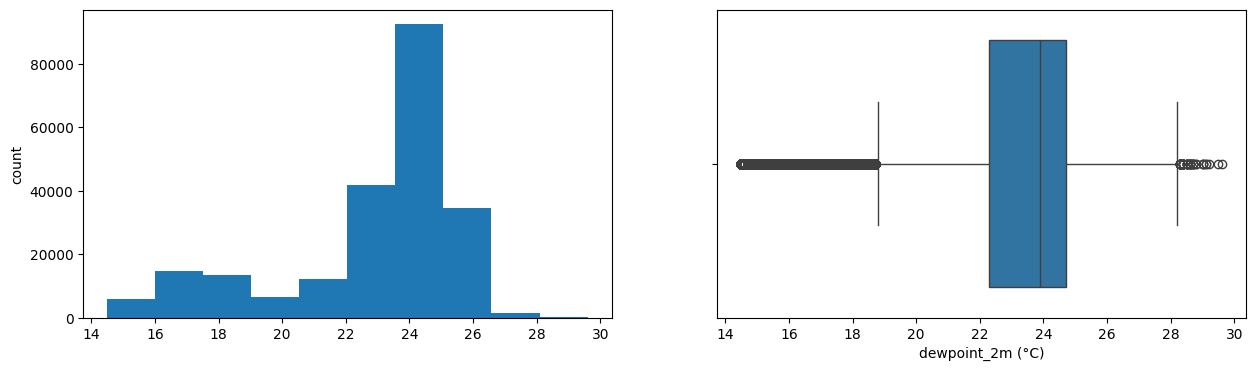

apparent_temperature (°C)
Skew : -1.05


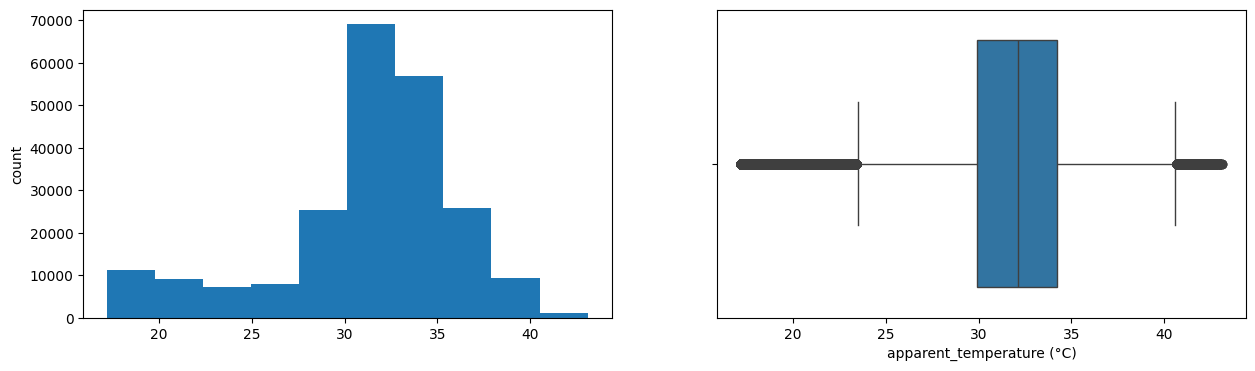

pressure_msl (hPa)
Skew : 0.21


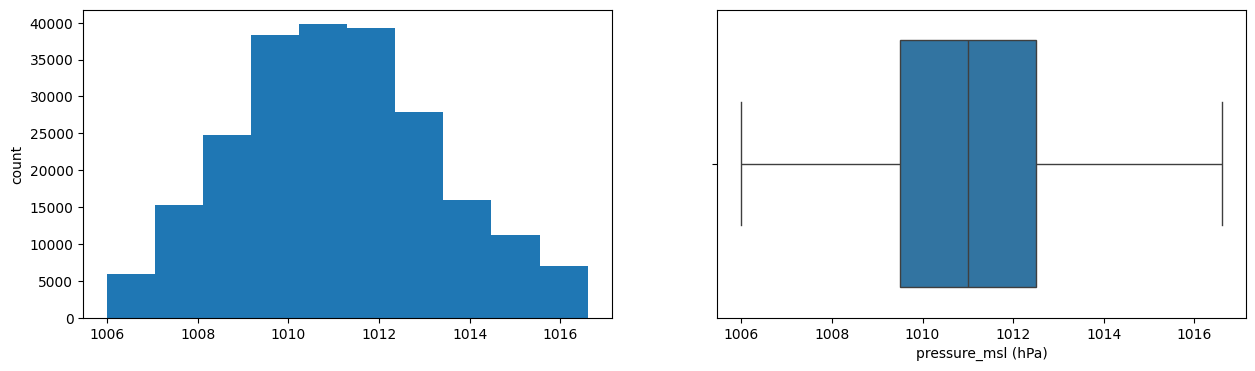

surface_pressure (hPa)
Skew : -1.77


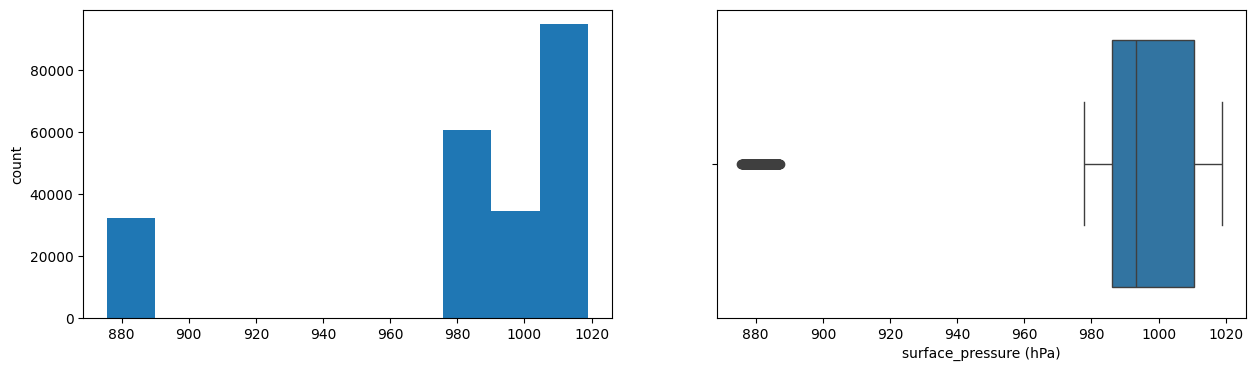

cloudcover (%)
Skew : 0.11


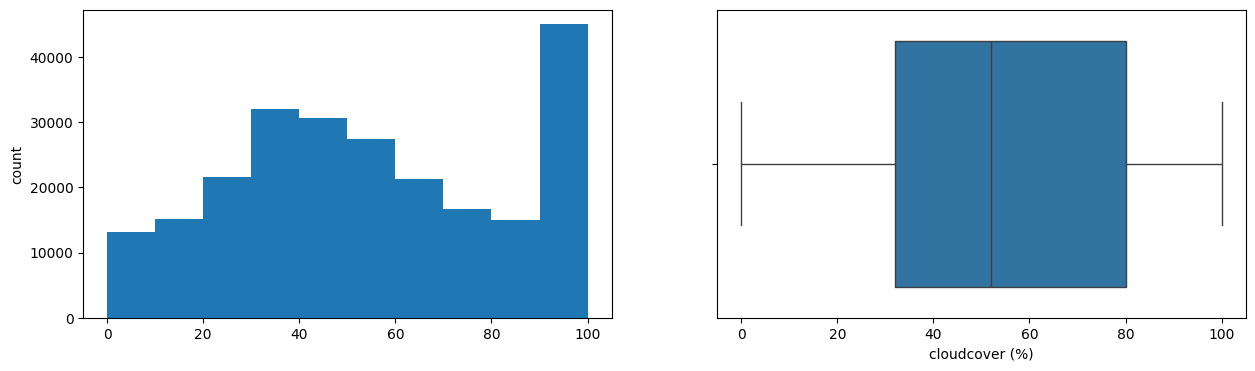

cloudcover_low (%)
Skew : 1.31


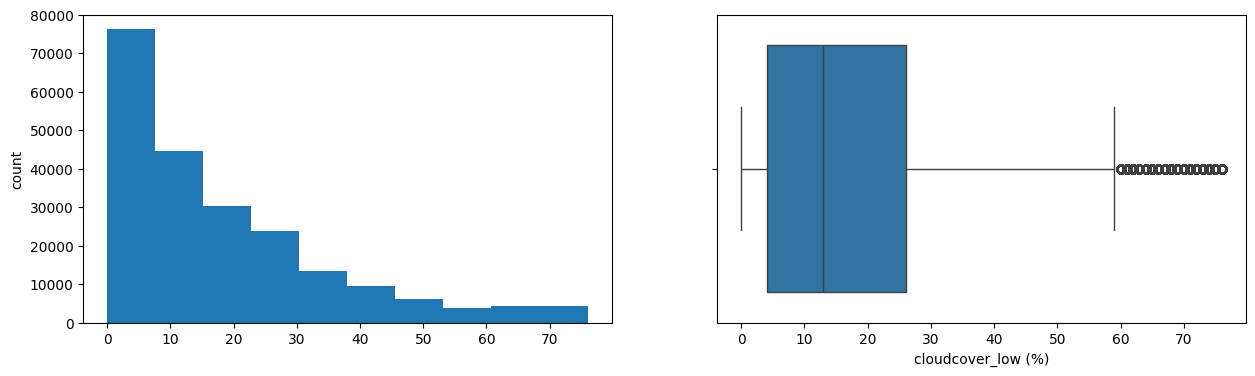

cloudcover_mid (%)
Skew : 1.13


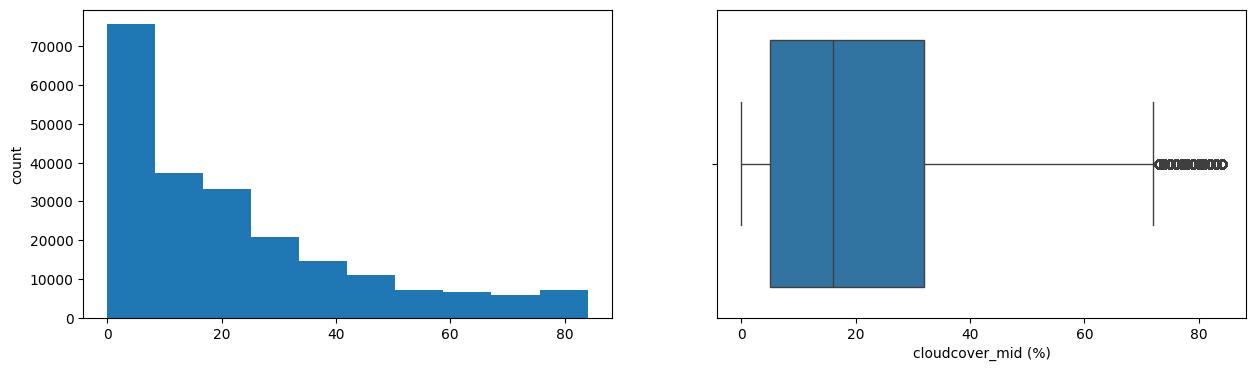

cloudcover_high (%)
Skew : -0.85


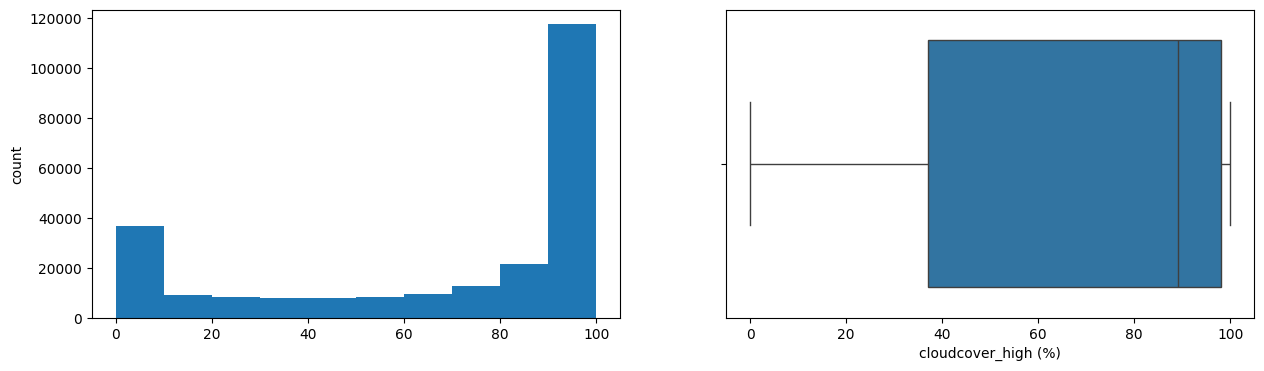

shortwave_radiation (W/m²)
Skew : 1.14


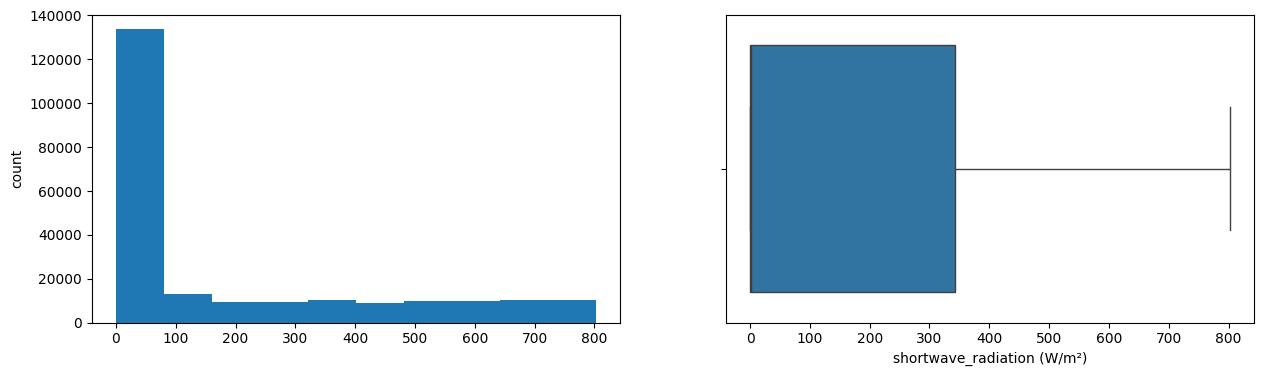

direct_radiation (W/m²)
Skew : 1.57


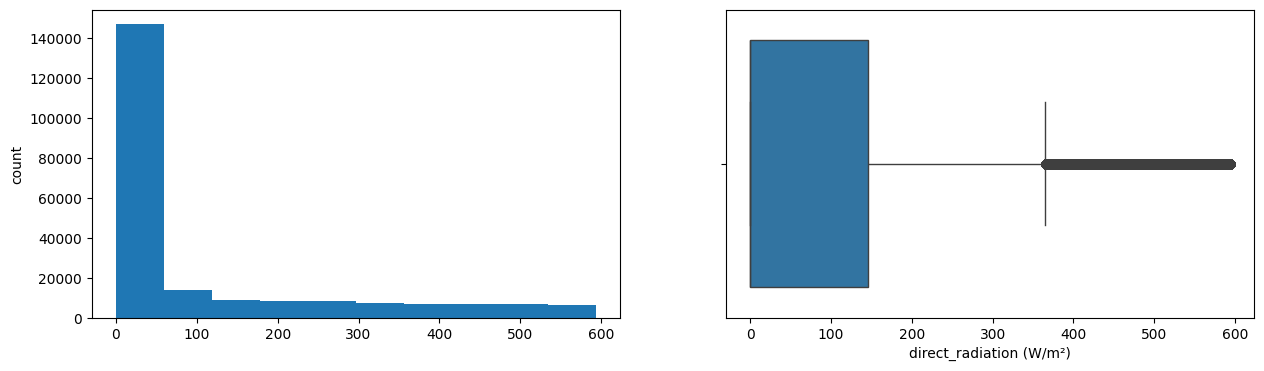

diffuse_radiation (W/m²)
Skew : 0.98


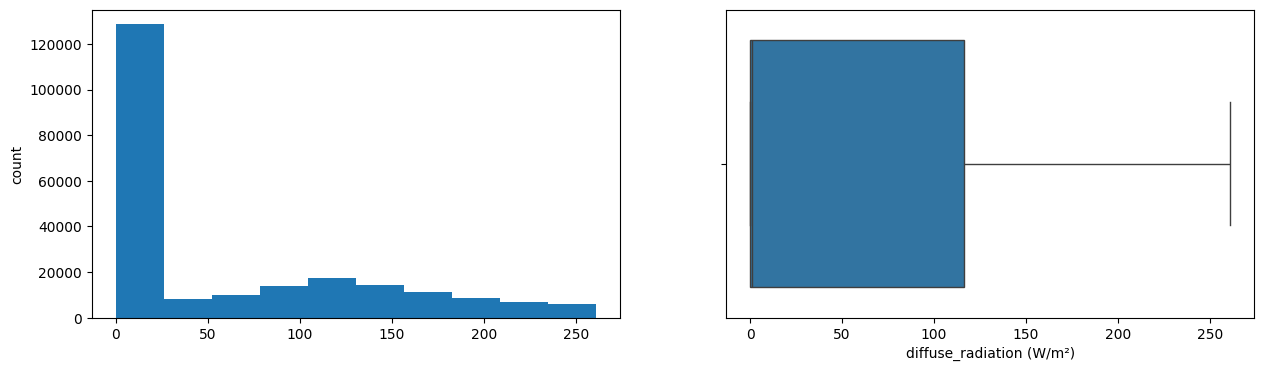

direct_normal_irradiance (W/m²)
Skew : 1.13


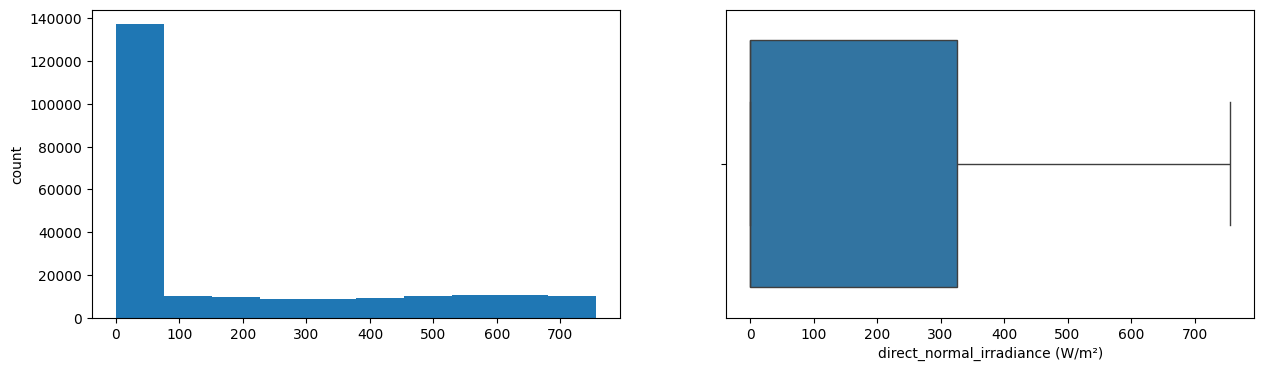

windspeed_10m (km/h)
Skew : 0.69


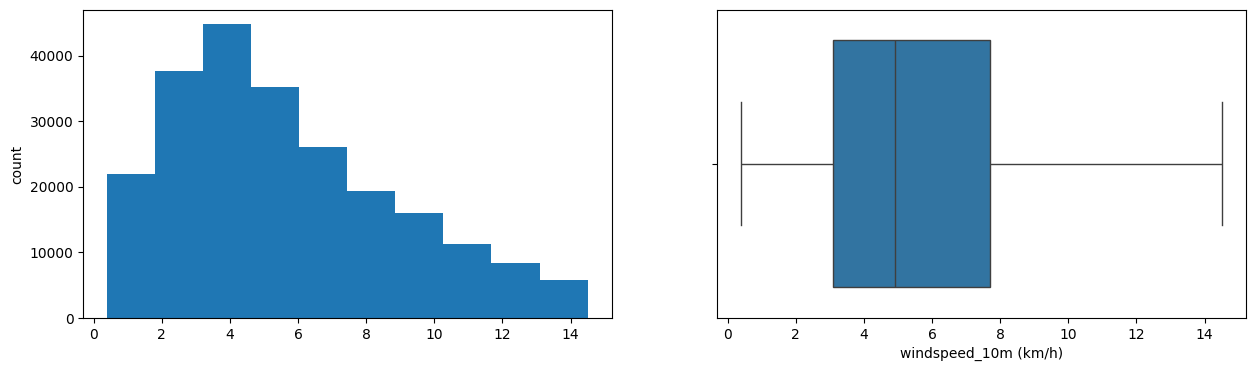

windspeed_100m (km/h)
Skew : 0.54


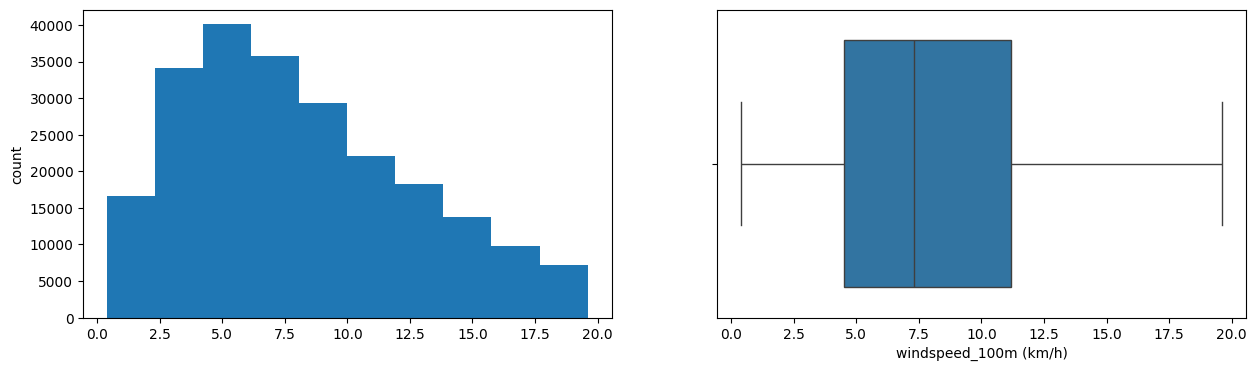

winddirection_10m (°)
Skew : -0.01


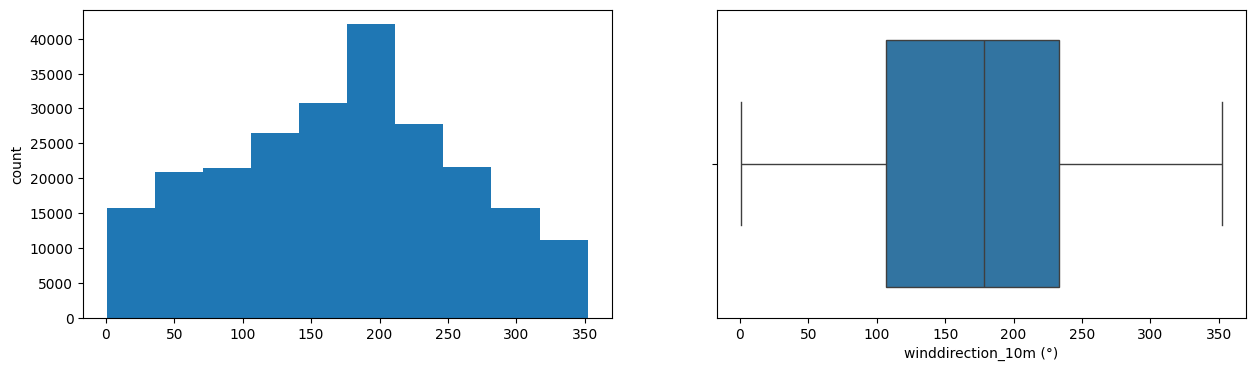

winddirection_100m (°)
Skew : 0.06


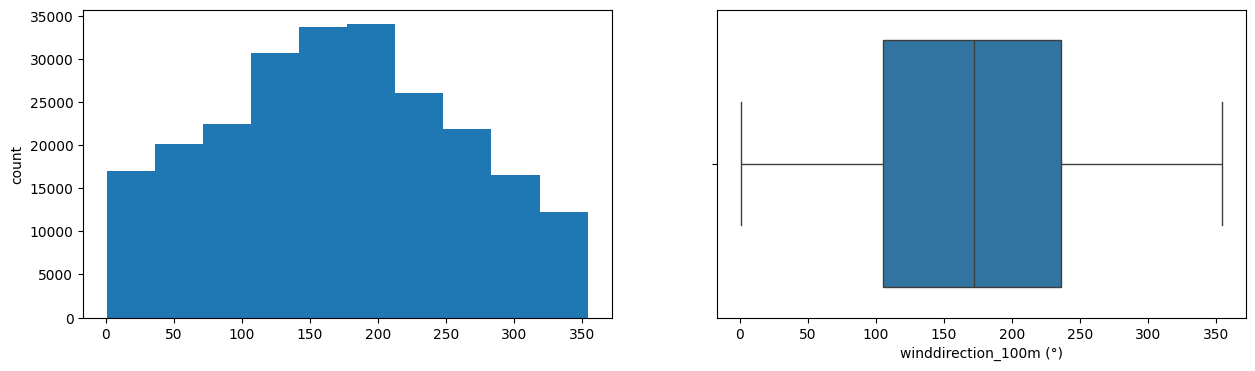

windgusts_10m (km/h)
Skew : 0.41


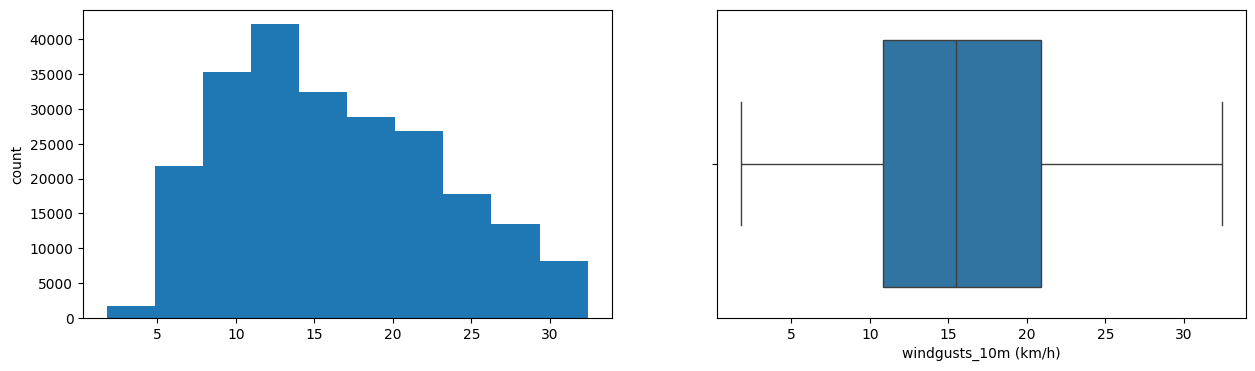

et0_fao_evapotranspiration (mm)
Skew : 1.15


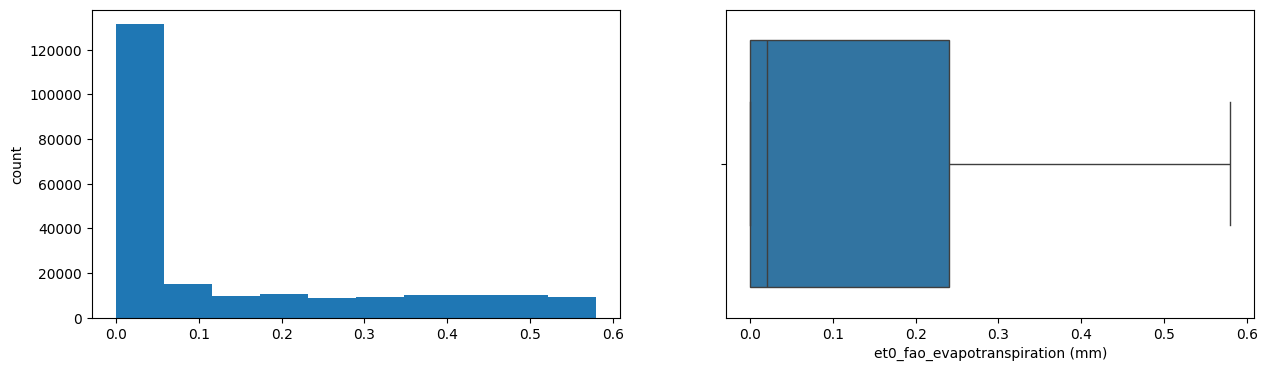

vapor_pressure_deficit (kPa)
Skew : 0.94


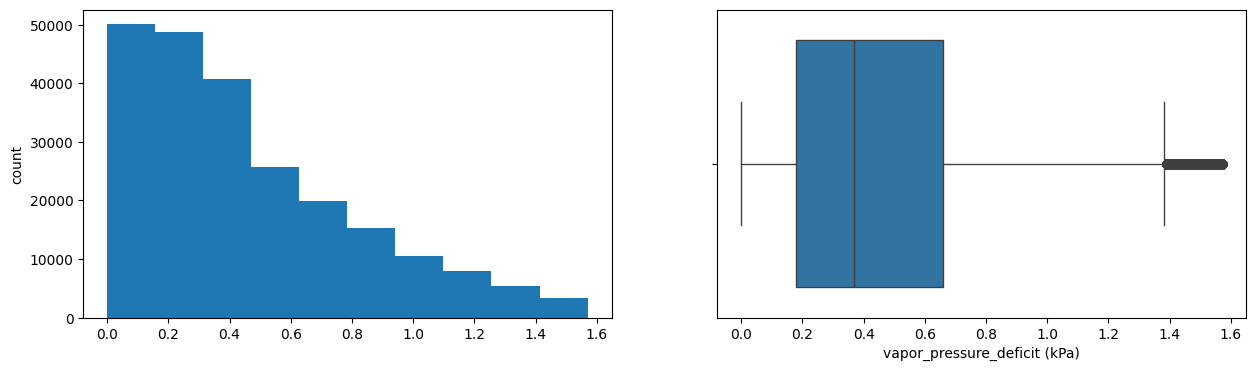

soil_temperature_0_to_7cm (°C)
Skew : -0.49


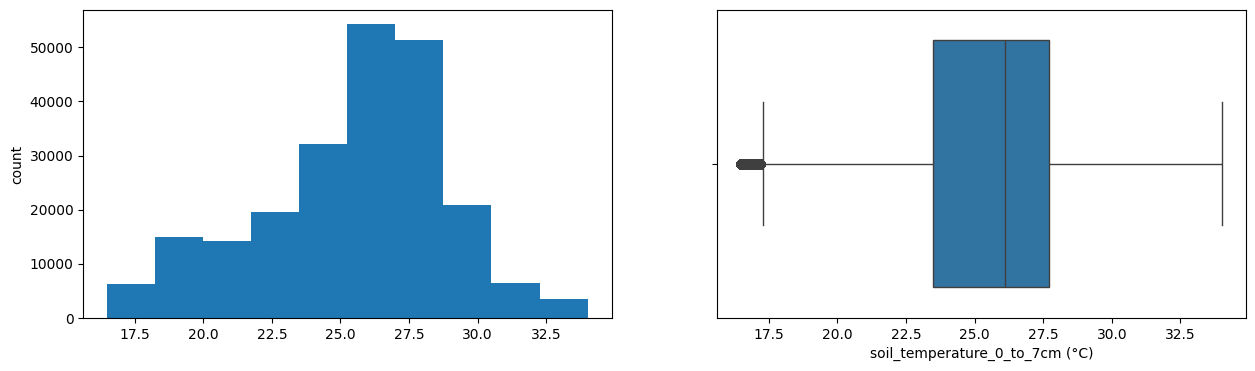

soil_temperature_7_to_28cm (°C)
Skew : -0.75


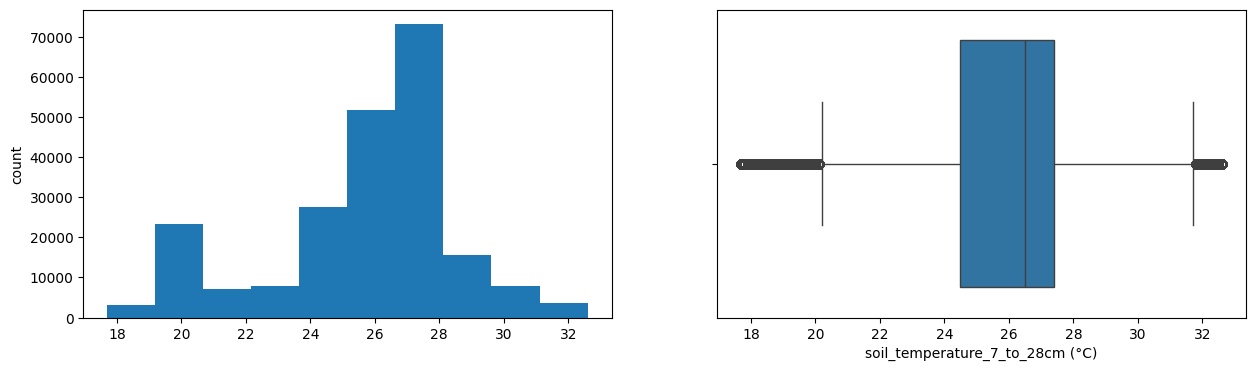

soil_temperature_28_to_100cm (°C)
Skew : -0.74


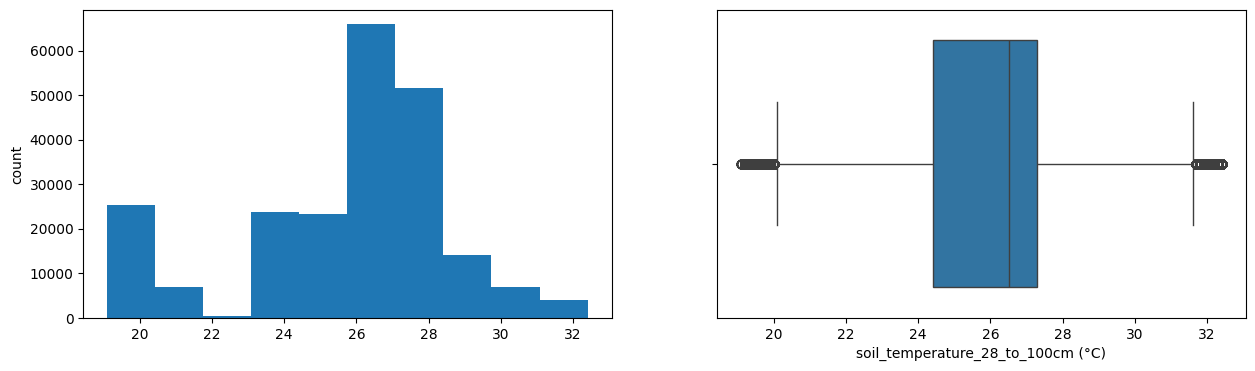

soil_temperature_100_to_255cm (°C)
Skew : -0.81


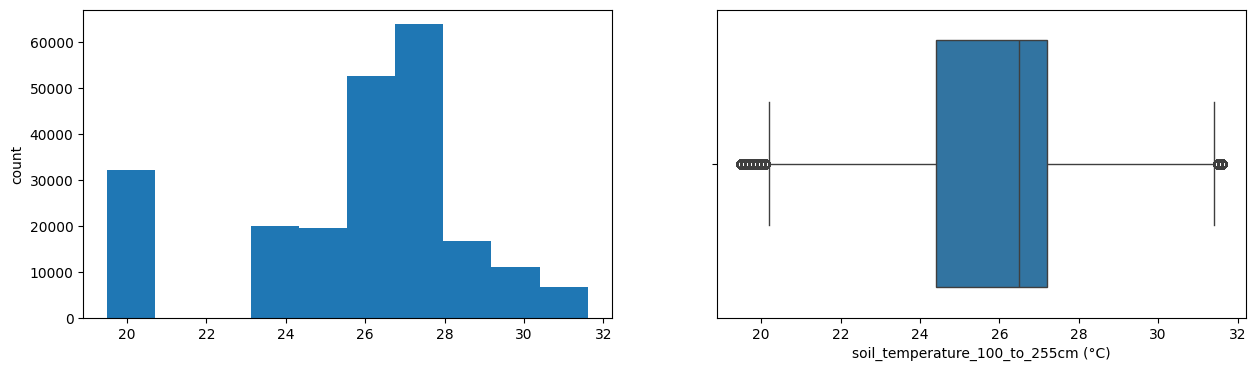

soil_moisture_0_to_7cm (m³/m³)
Skew : -0.71


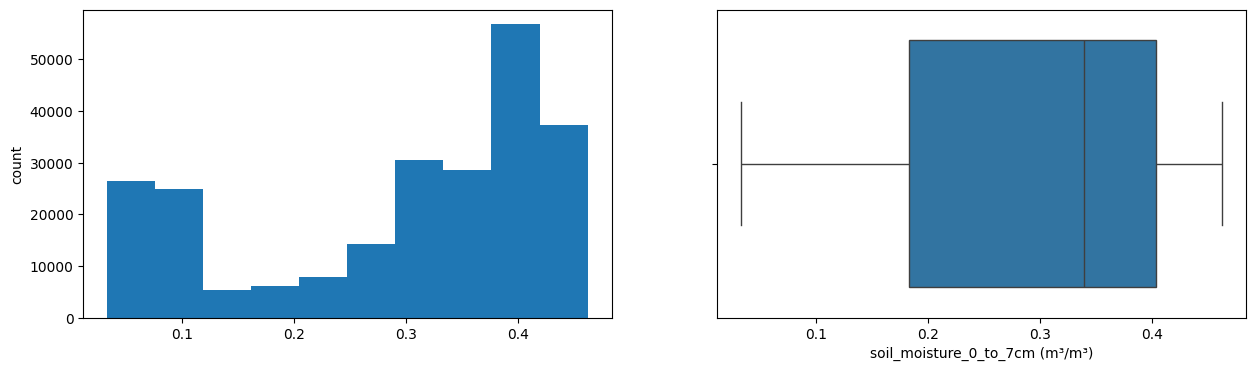

soil_moisture_7_to_28cm (m³/m³)
Skew : -0.68


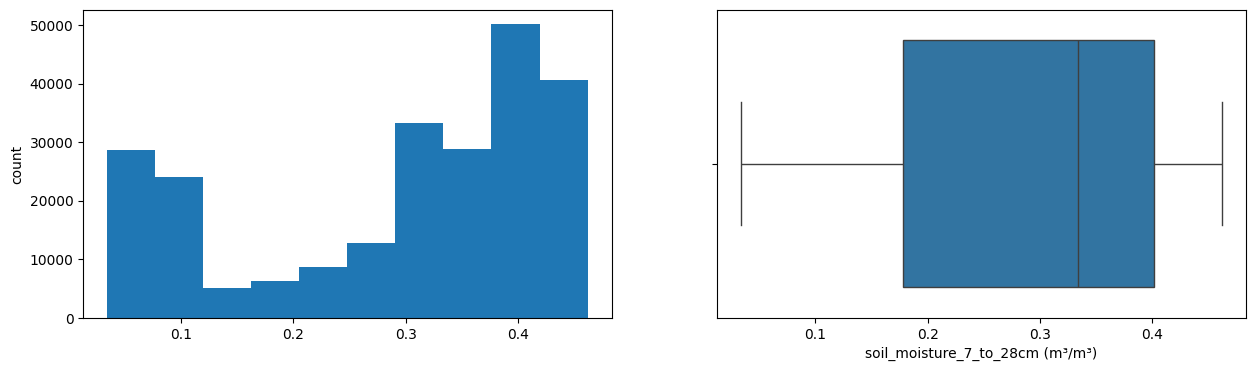

soil_moisture_28_to_100cm (m³/m³)
Skew : -0.61


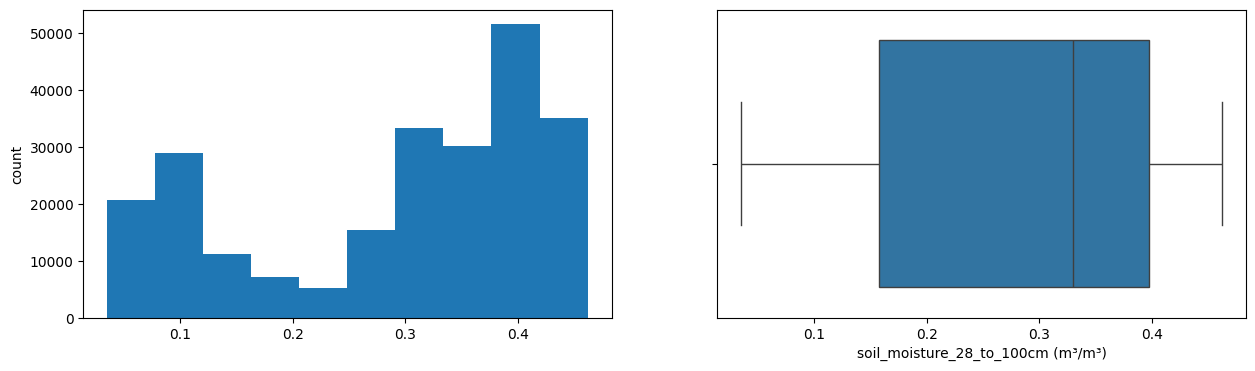

soil_moisture_100_to_255cm (m³/m³)
Skew : -1.01


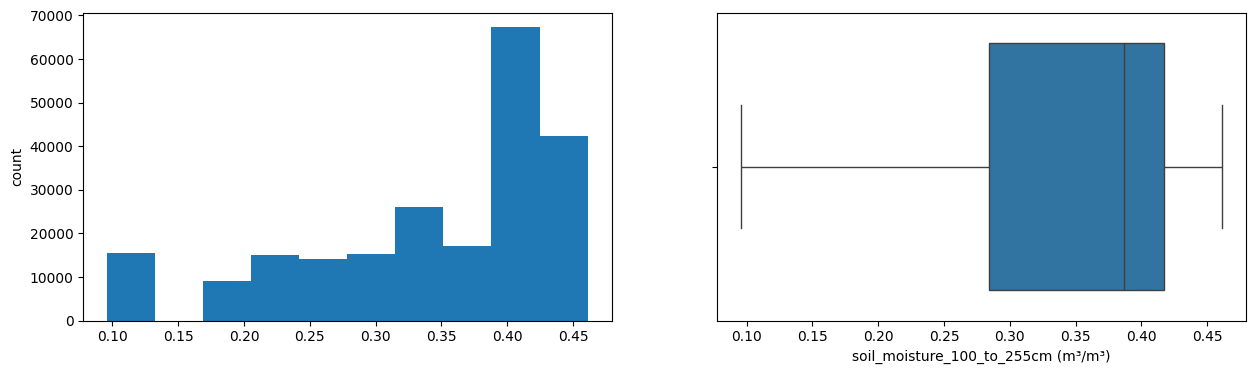

city
Skew : 0.13


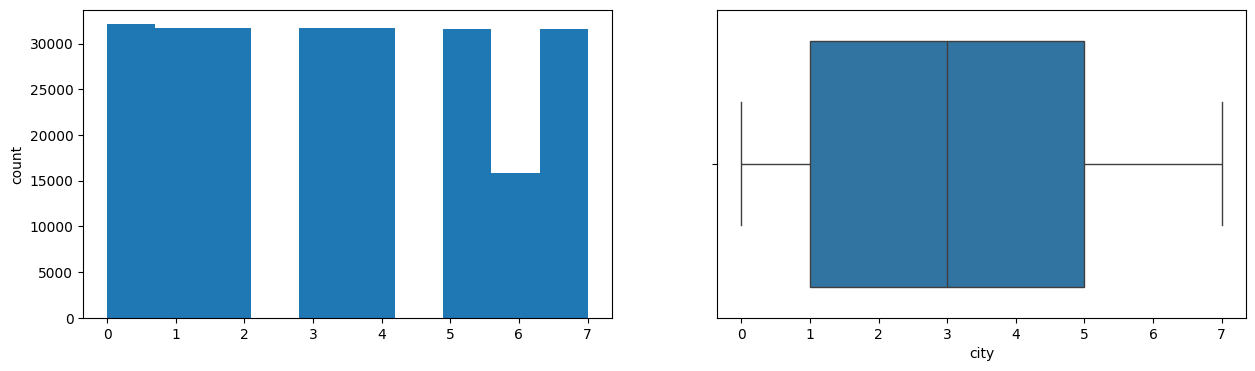

In [604]:
numeric_columns = train.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_columns:
    if col != "city":
        train[col] = symmetric_zscore_filter(train[col].copy(), threshold=2)
    print(col)
    print("Skew :", round(train[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

train.dropna(inplace=True)

In [605]:
len(train)

133039

In [606]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

scaler = QuantileTransformer(output_distribution="normal")
t_city = train["city"].copy()
t_col = train.drop("city", axis=1).columns
train = scaler.fit_transform(train.drop("city", axis=1))
train = pd.DataFrame(train, columns=t_col)
train["city"] = t_city

temperature_2m (°C)
Skew : -0.03


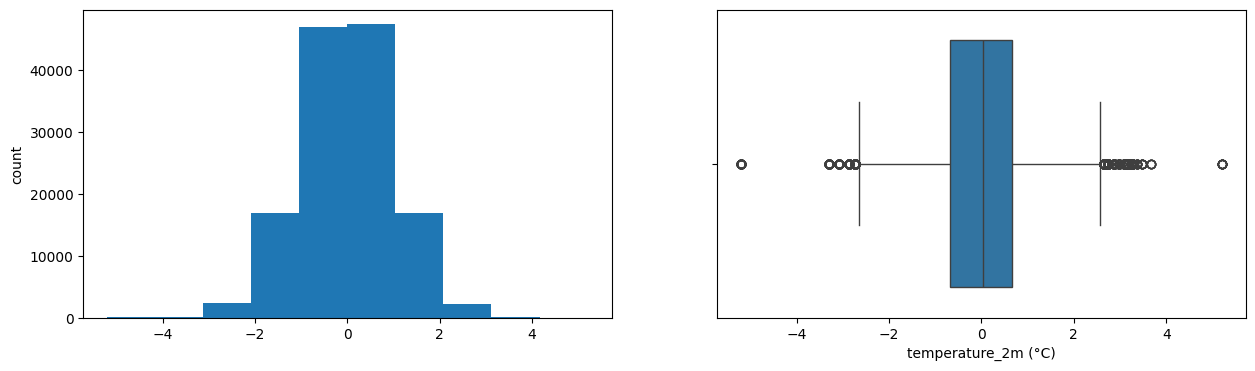

relativehumidity_2m (%)
Skew : 0.68


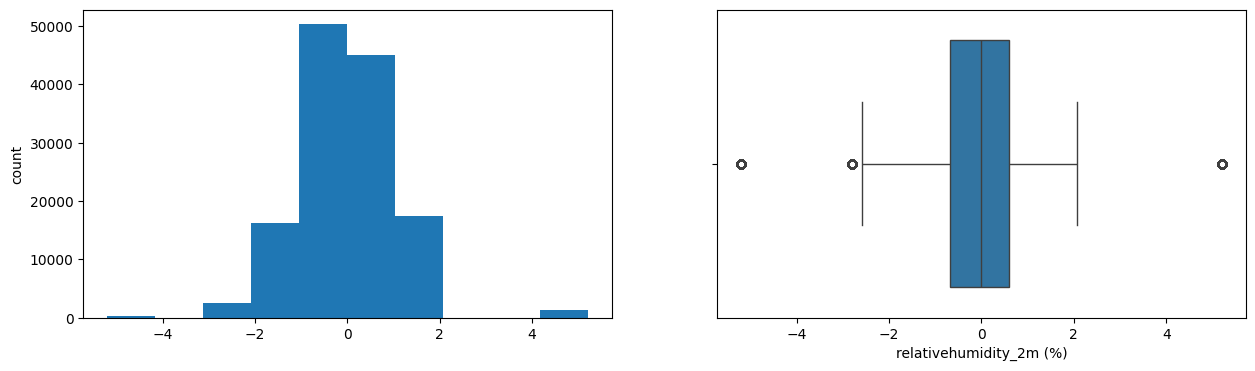

dewpoint_2m (°C)
Skew : 0.02


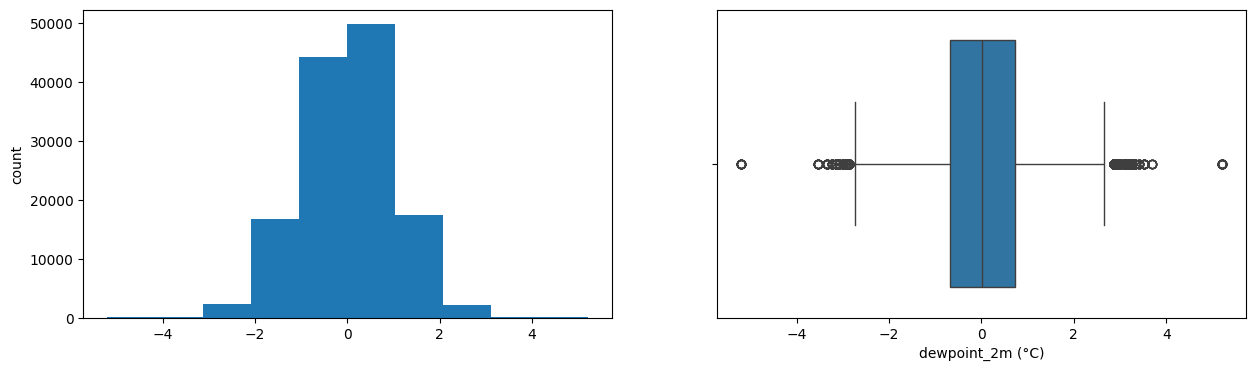

apparent_temperature (°C)
Skew : -0.04


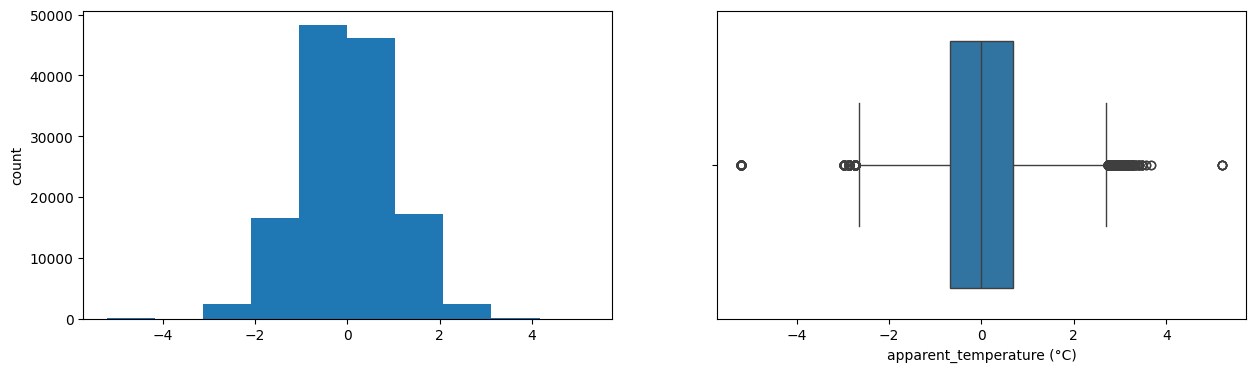

pressure_msl (hPa)
Skew : -0.05


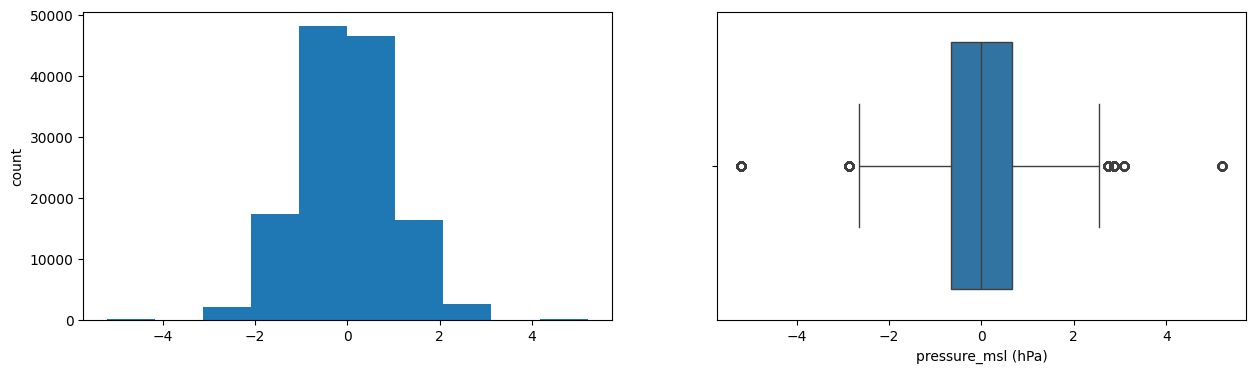

surface_pressure (hPa)
Skew : 0.02


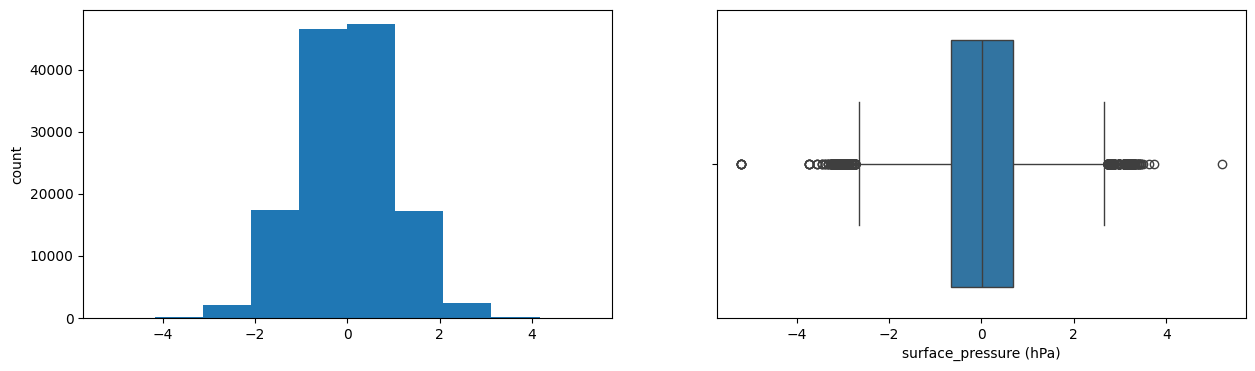

cloudcover (%)
Skew : 1.17


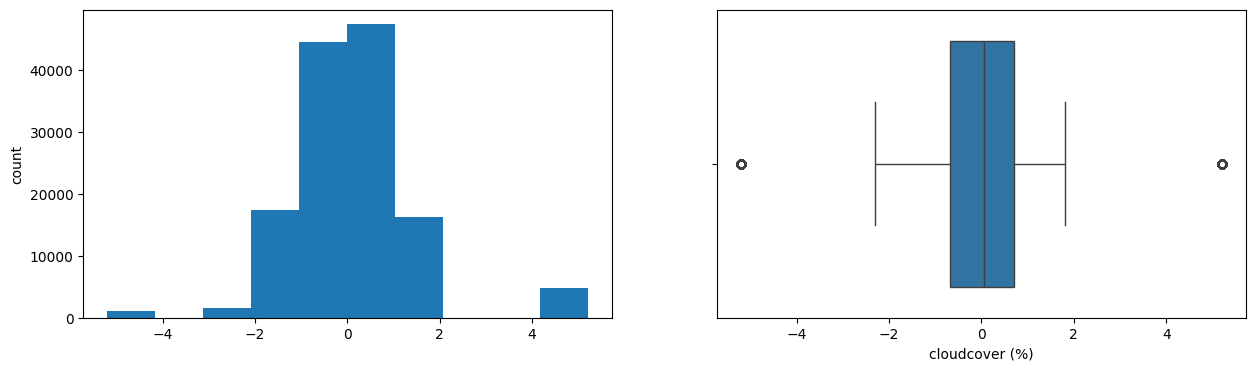

cloudcover_low (%)
Skew : -1.6


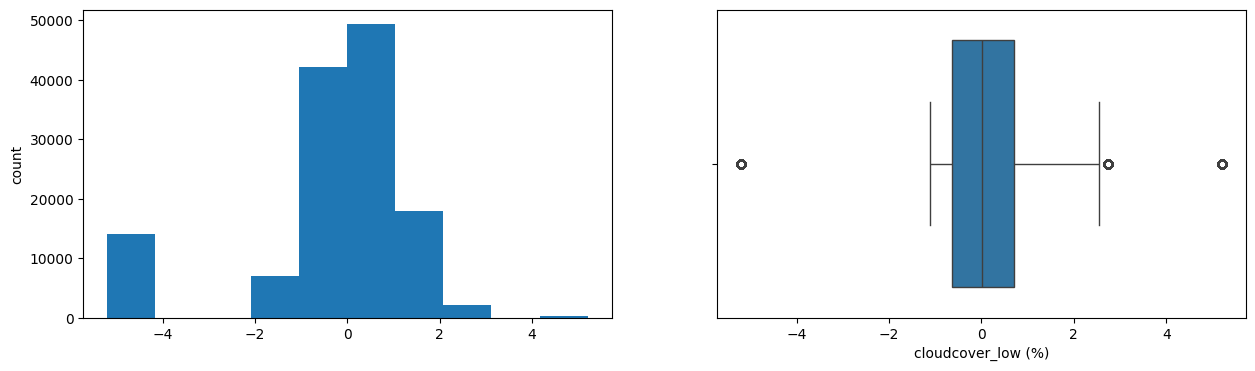

cloudcover_mid (%)
Skew : -1.53


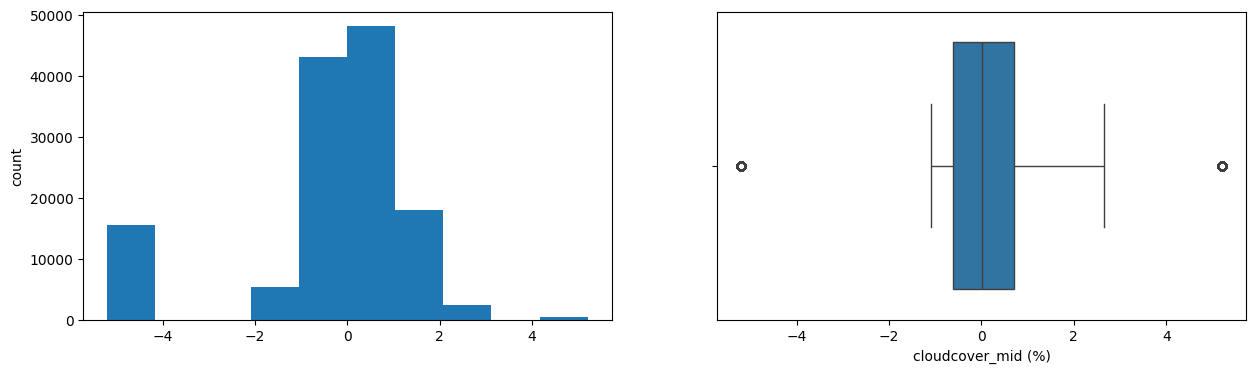

cloudcover_high (%)
Skew : 0.16


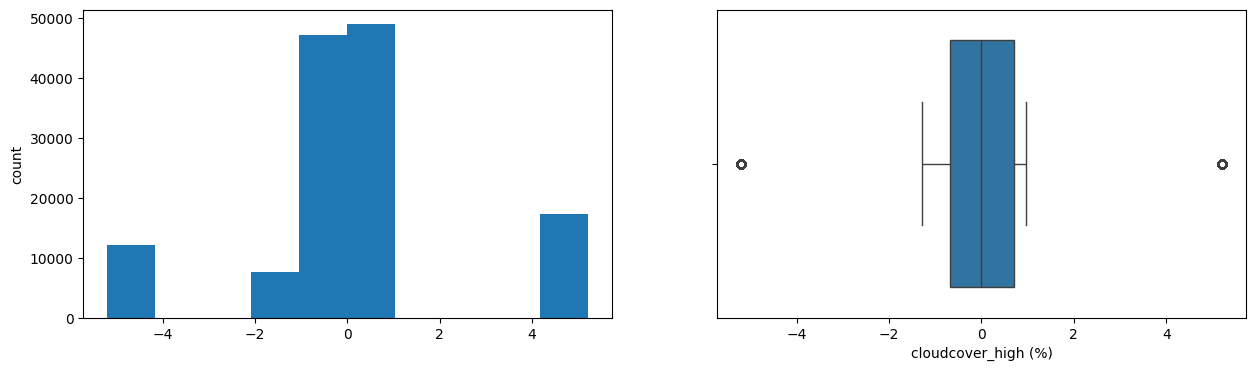

shortwave_radiation (W/m²)
Skew : 0.3


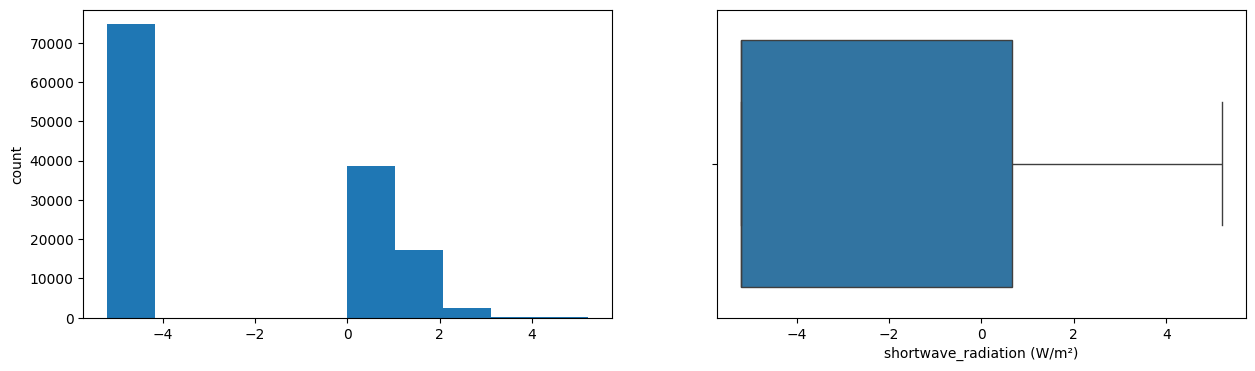

direct_radiation (W/m²)
Skew : 0.39


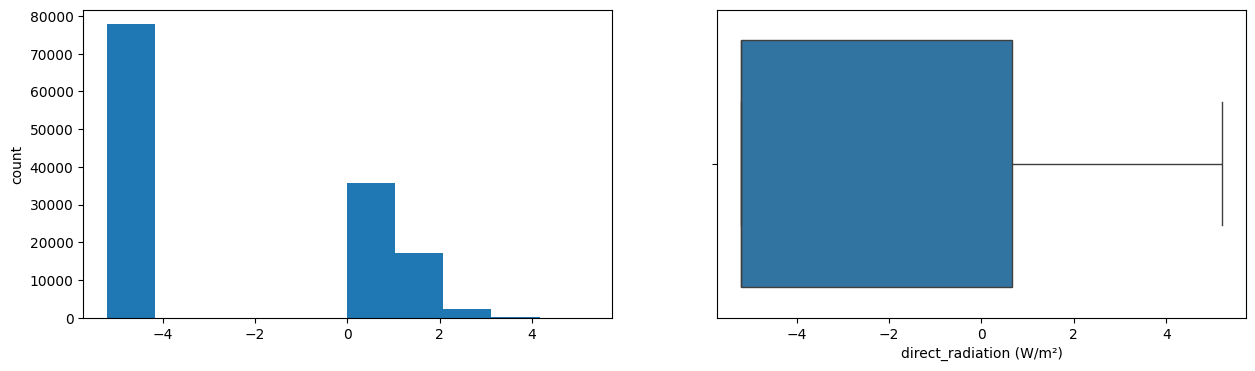

diffuse_radiation (W/m²)
Skew : 0.3


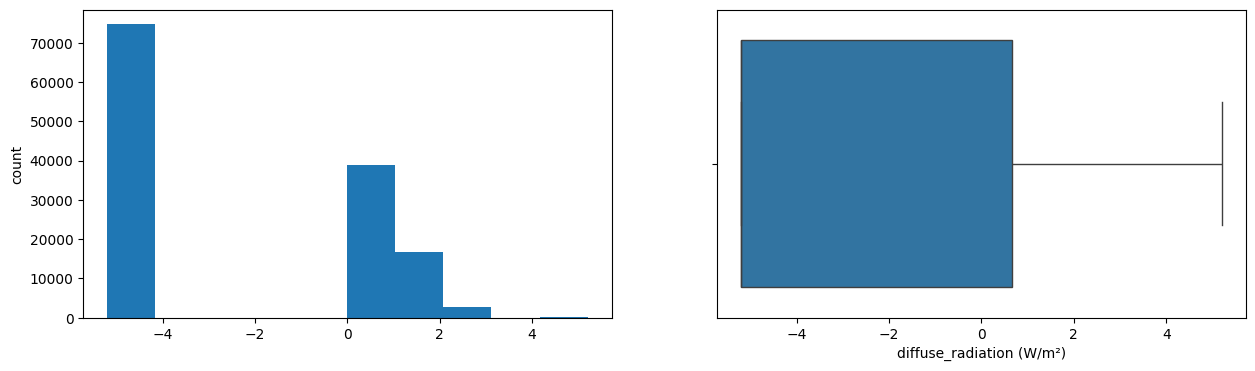

direct_normal_irradiance (W/m²)
Skew : 0.5


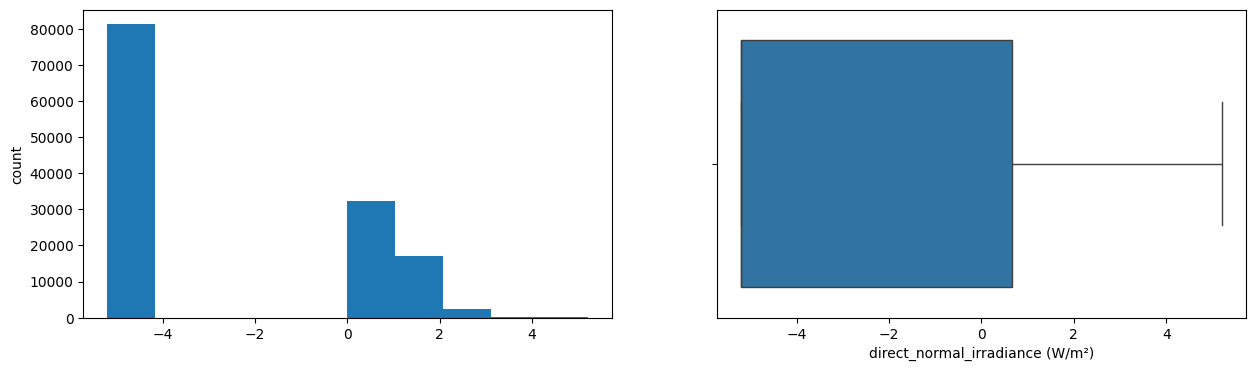

windspeed_10m (km/h)
Skew : -0.23


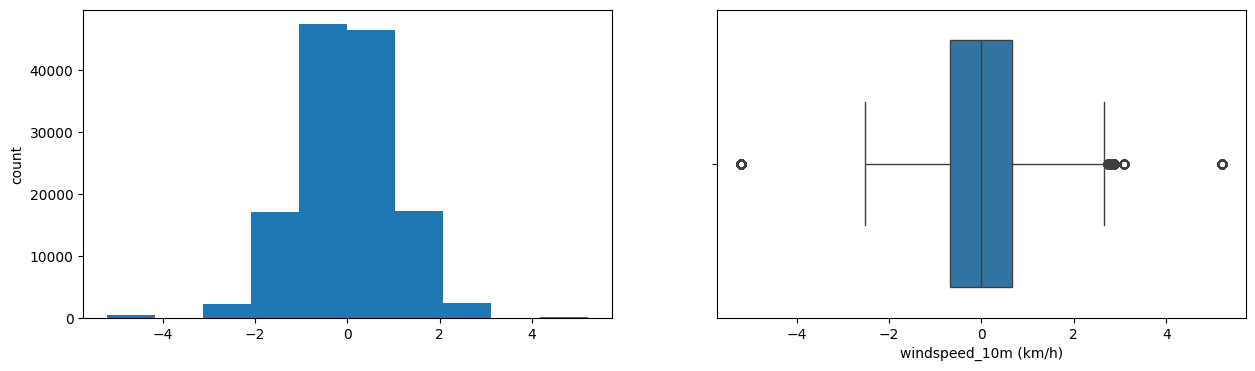

windspeed_100m (km/h)
Skew : -0.08


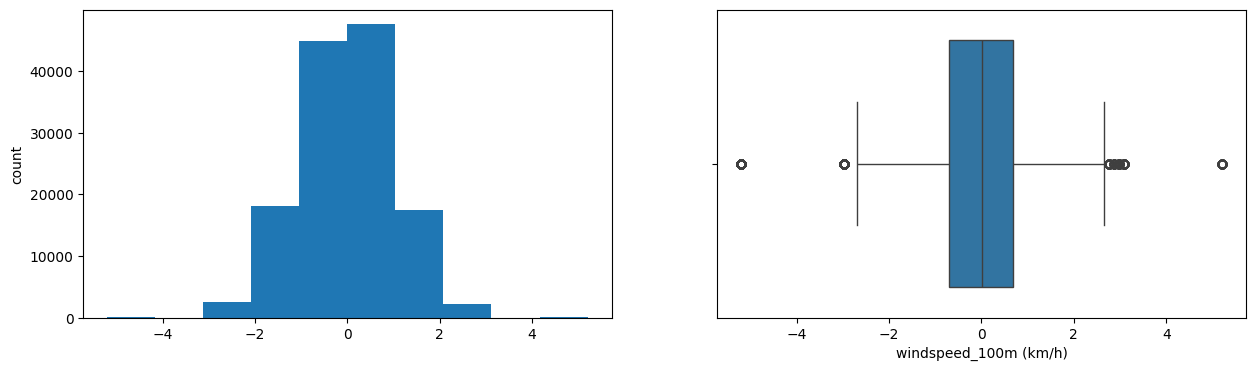

winddirection_10m (°)
Skew : 0.02


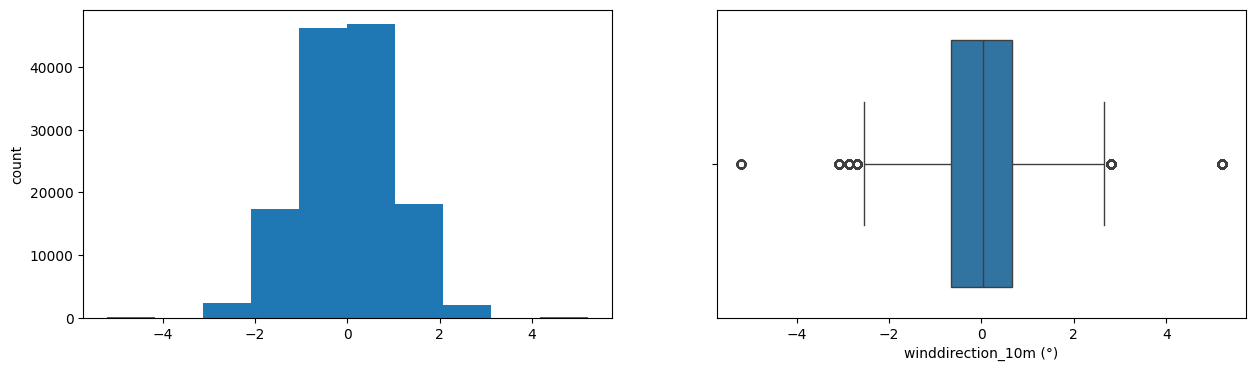

winddirection_100m (°)
Skew : 0.05


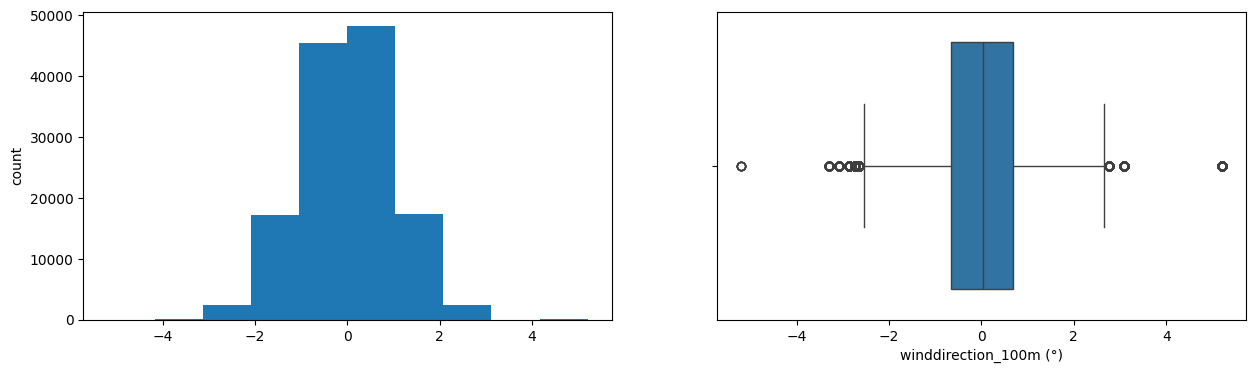

windgusts_10m (km/h)
Skew : 0.05


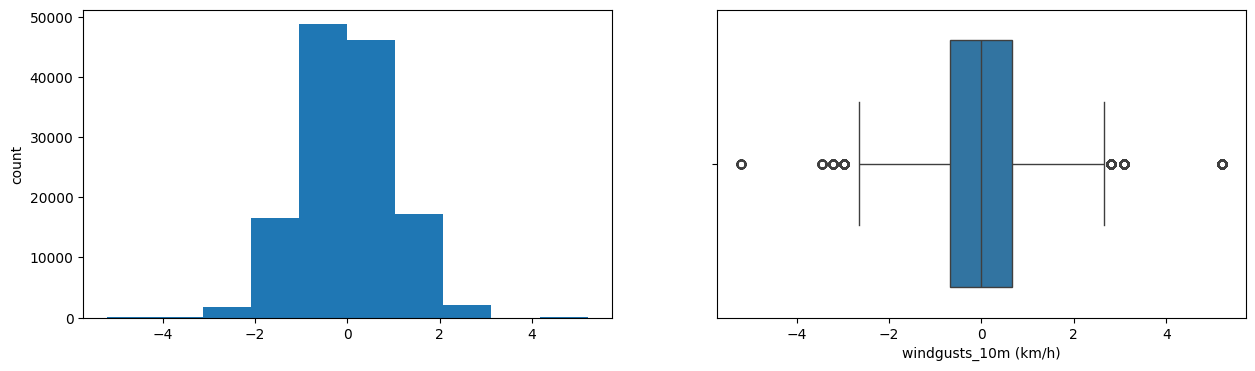

et0_fao_evapotranspiration (mm)
Skew : -0.04


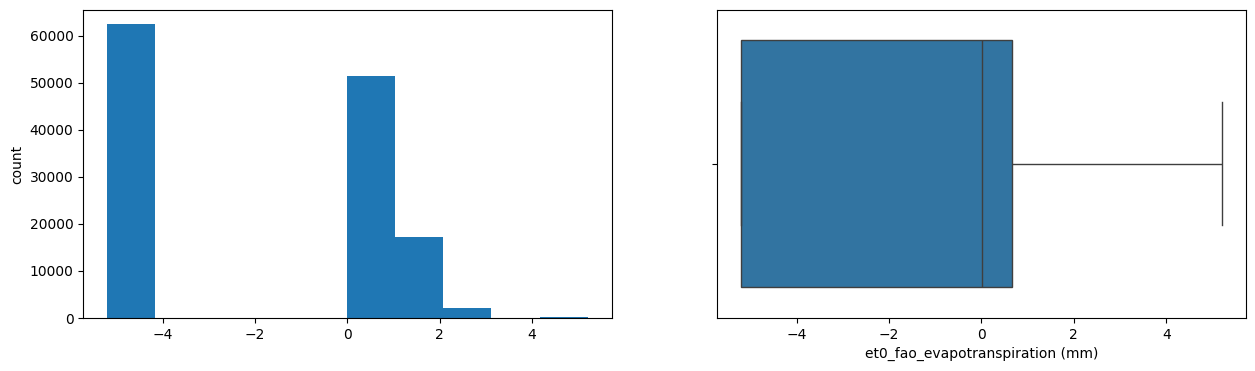

vapor_pressure_deficit (kPa)
Skew : -0.26


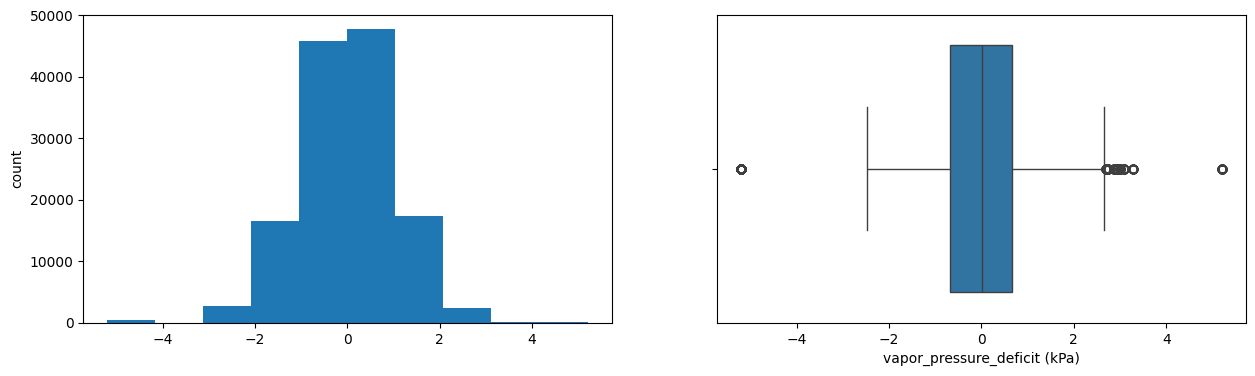

soil_temperature_0_to_7cm (°C)
Skew : -0.0


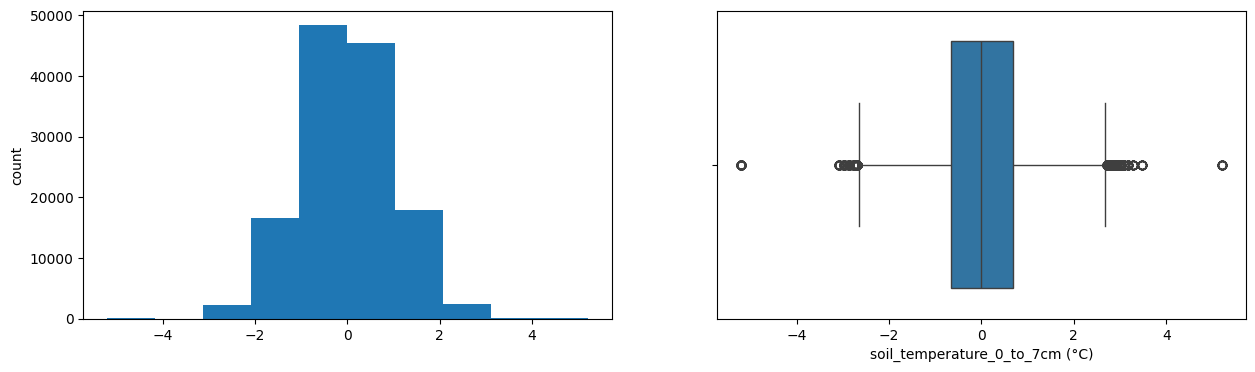

soil_temperature_7_to_28cm (°C)
Skew : 0.08


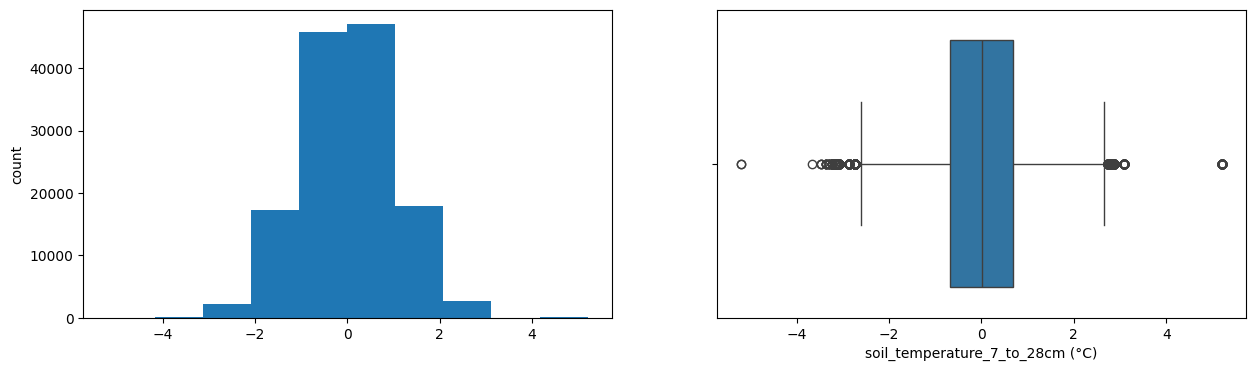

soil_temperature_28_to_100cm (°C)
Skew : 0.03


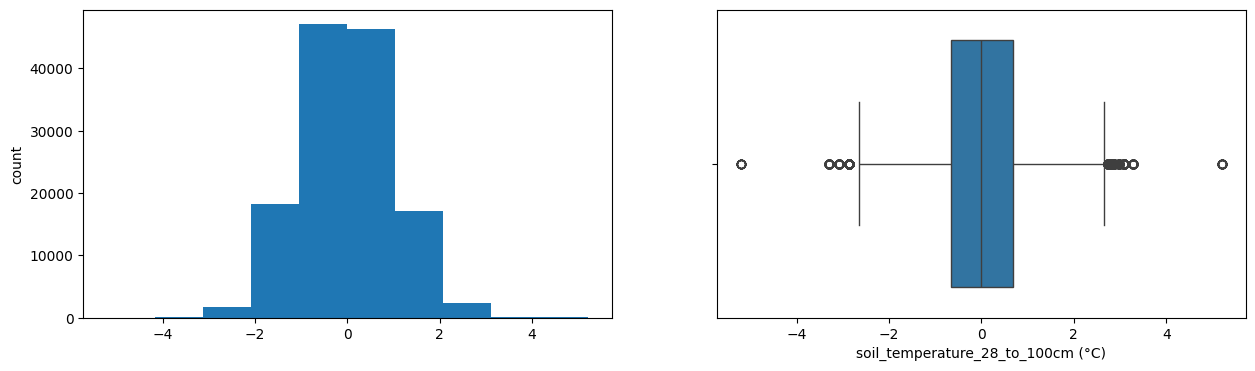

soil_temperature_100_to_255cm (°C)
Skew : 0.21


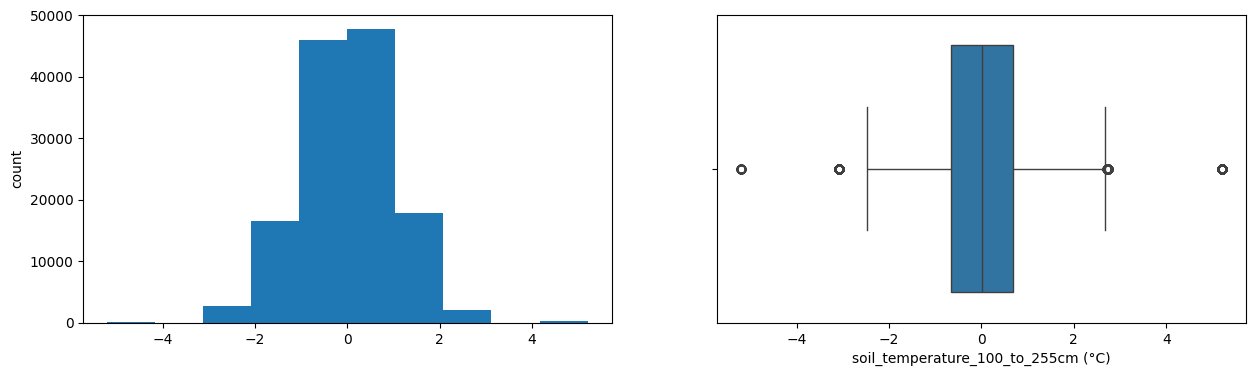

soil_moisture_0_to_7cm (m³/m³)
Skew : 0.08


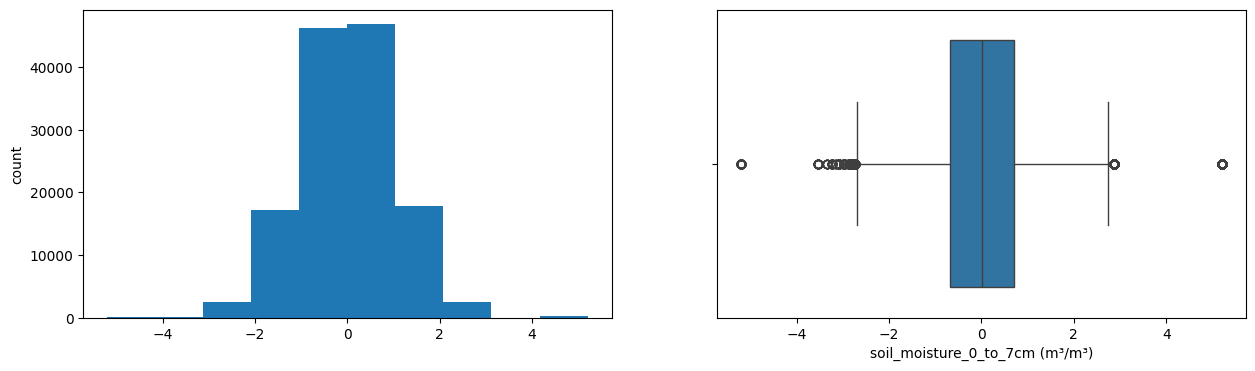

soil_moisture_7_to_28cm (m³/m³)
Skew : 0.01


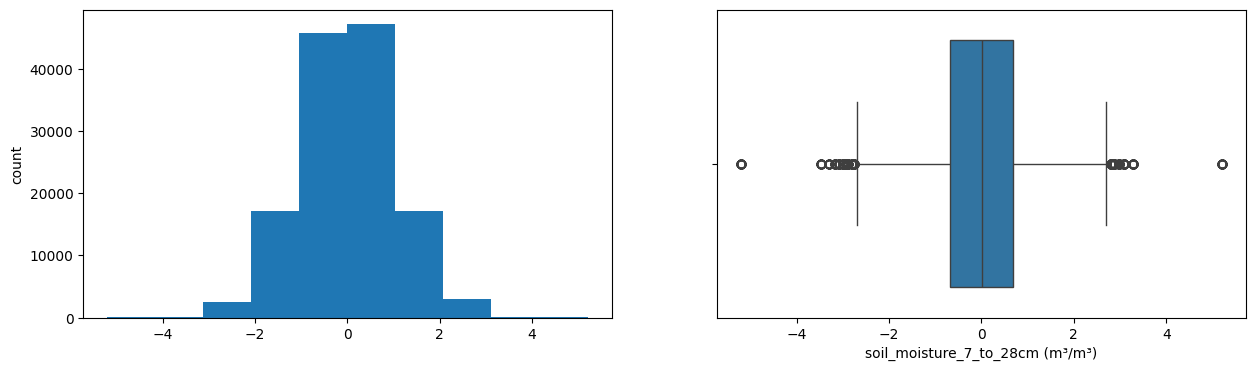

soil_moisture_28_to_100cm (m³/m³)
Skew : -0.03


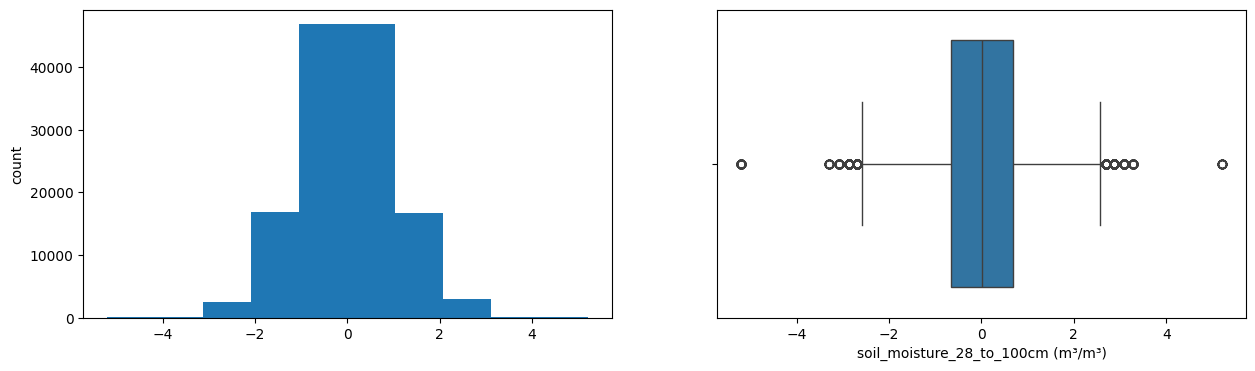

soil_moisture_100_to_255cm (m³/m³)
Skew : -0.27


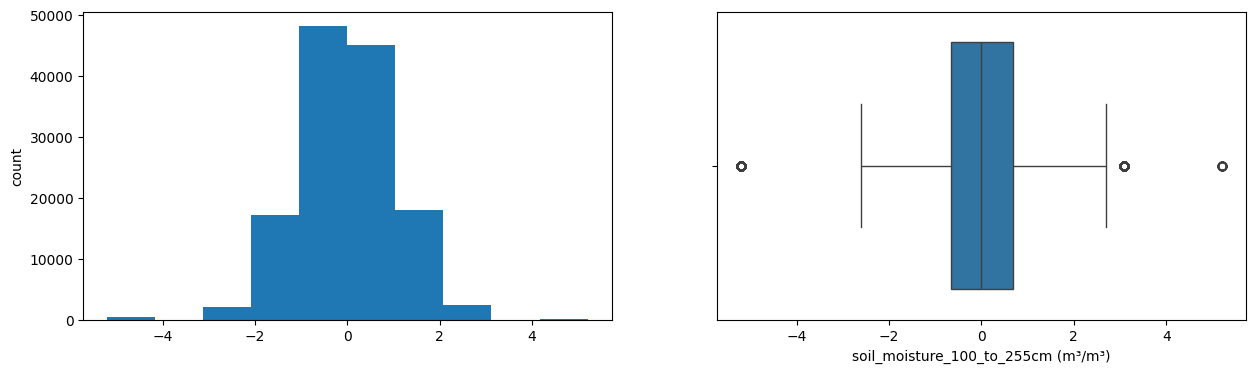

city
Skew : 0.38


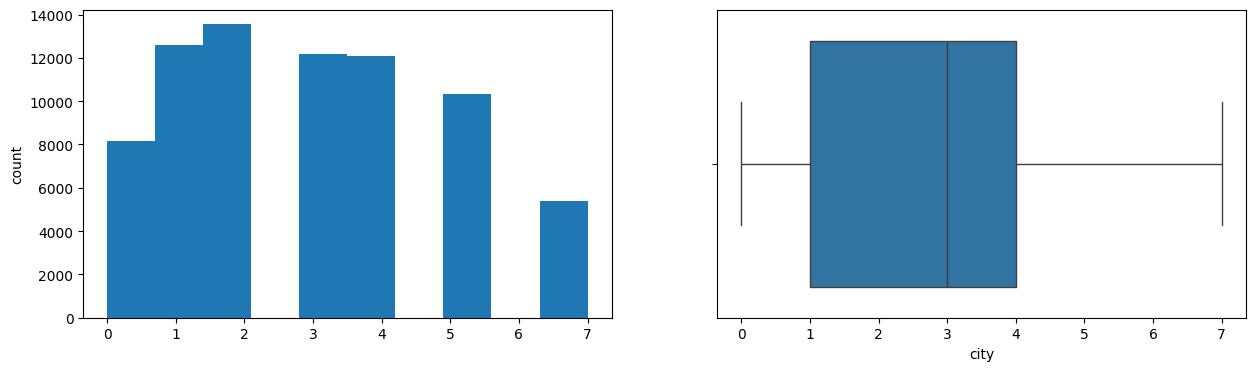

In [607]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = train.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_columns:
    print(col)
    print("Skew :", round(train[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

## Preprocessing


In [608]:
# Data Preprocessing
"""
you can fill this section with your code for data preprocessing
"""
# Example
train = train.select_dtypes(exclude=["object"])
train.dropna(axis=0, inplace=True)

test["city"] = le.fit_transform(test["city"]).astype(np.int64)
test_df = test
# test_df["time"] = pd.to_datetime(test_df["time"]).dt.hour
test_df = test_df.select_dtypes(exclude=["object"])
test_df = test.drop(["id", "snowfall (cm)", "time"], axis=1)

In [609]:
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

X = train.drop("city", axis=1)  # features
y = train["city"].astype("int64")  # target variable

# Print class distribution before SMOTE
print("Original city class distribution:", Counter(y))

# Apply SMOTE
smote = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution after SMOTE
print("Class city distribution after SMOTE:", Counter(y_resampled))

# Create a new balanced DataFrame if needed
train = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="city")],
    axis=1,
)

Original city class distribution: Counter({2: 13544, 1: 12595, 3: 12171, 4: 12088, 5: 10336, 0: 8145, 7: 5402})
Class city distribution after SMOTE: Counter({7: 12915, 0: 11969, 5: 11125, 4: 10469, 3: 10344, 1: 10064, 2: 9786})


In [610]:
X = train.drop(columns=[TARGET])
y = train[TARGET]

## Modeling


In [611]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


def objective(trial):
    #     params = {
    #         'iterations': trial.suggest_int('iterations', 100, 1000),
    #         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
    #         'depth': trial.suggest_int('depth', 4, 10),
    # #         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
    # #         'border_count': trial.suggest_int('border_count', 32, 255),
    #         'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 10),
    # #         'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
    #     }

    # Define the hyperparameters to optimize
    params = {
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        # "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        # "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        # "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        # "gamma": trial.suggest_float("gamma", 1e-8, 1.0),
        # "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 1.0),
        # "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 1.0),
    }

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create and train the model
    model = XGBRegressor(**params, random_state=42)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=False,
    )

    # Make predictions on validation set
    y_pred = model.predict(X_val)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse


# Create a study object and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Print the best parameters and the best score
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)

[I 2024-10-08 21:40:47,542] A new study created in memory with name: no-name-9330eb1b-3777-4ab2-a58f-75b79bf548ff


[I 2024-10-08 21:40:53,998] Trial 0 finished with value: 0.24807741691987156 and parameters: {'max_depth': 10, 'learning_rate': 0.012001384744238248, 'n_estimators': 266}. Best is trial 0 with value: 0.24807741691987156.
[I 2024-10-08 21:40:58,863] Trial 1 finished with value: 0.2150226516304341 and parameters: {'max_depth': 10, 'learning_rate': 0.06881727334365935, 'n_estimators': 284}. Best is trial 1 with value: 0.2150226516304341.
[I 2024-10-08 21:40:59,861] Trial 2 finished with value: 0.3565844601535575 and parameters: {'max_depth': 1, 'learning_rate': 0.0547722826153675, 'n_estimators': 272}. Best is trial 1 with value: 0.2150226516304341.
[I 2024-10-08 21:41:04,768] Trial 3 finished with value: 0.2173966434256811 and parameters: {'max_depth': 10, 'learning_rate': 0.05583963234113609, 'n_estimators': 261}. Best is trial 1 with value: 0.2150226516304341.
[I 2024-10-08 21:41:06,608] Trial 4 finished with value: 0.22778178292197274 and parameters: {'max_depth': 7, 'learning_rate': 

Best parameters: {'max_depth': 10, 'learning_rate': 0.08660716164248207, 'n_estimators': 284}
Best RMSE: 0.21273111555490679


In [612]:
best_params = study.best_params
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08660716164248207,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=284, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [613]:
# Modeling using
"""
Change the code just if you need to
"""

rfr = best_model
predict = rfr.predict(test_df)
submission[TARGET] = predict

submission.to_csv(SUBMISSION_FILE, index=False)

In [614]:
SUBMISSION_FILE

'submission\\submission_8-10-2024-21-39.csv'